In [29]:
import pandas as pd  
import numpy as np  
import math
import matplotlib.pyplot as plt  
import seaborn as sns 
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# <a class="anchor">Table of Content</a>

### [1. Data Importation](#import)

### [2. Cleaning / Data visualisation](#eda)

### [3. Features selection](#fe)

### [4. Modeling](#fe1)

[a. Linear Regression](#fe1a)

[b. Random Forest](#fe1b)

[c. Ridge Regression](#fe1c)

[d. Lasso Regression](#fe1d)

[e. Elastic Regression](#fe1e)

[f. Bilinear Regression](#fe1f)


### [5. Tests](#fe2)


### <a class="anchor" id="import">1. Data Importation

In [30]:
from pandas import ExcelWriter
from pandas import ExcelFile
data=pd.read_csv('Scrapped Data.csv')

In [31]:
data.head()

web-scraper-order                              web-scraper-start-url pages  \
0   1644854635-1255  https://www.mubawab.ma/fr/ct/casablanca/immobi...     2   
1   1644854348-1155  https://www.mubawab.ma/fr/ct/casablanca/immobi...     5   
2   1644854563-1229  https://www.mubawab.ma/fr/ct/casablanca/immobi...     3   
3   1644854236-1113  https://www.mubawab.ma/fr/ct/casablanca/immobi...     6   
4   1644854518-1212  https://www.mubawab.ma/fr/ct/casablanca/immobi...     3   

                                          pages-href  \
0  https://www.mubawab.ma/fr/ct/casablanca/immobi...   
1  https://www.mubawab.ma/fr/ct/casablanca/immobi...   
2  https://www.mubawab.ma/fr/ct/casablanca/immobi...   
3  https://www.mubawab.ma/fr/ct/casablanca/immobi...   
4  https://www.mubawab.ma/fr/ct/casablanca/immobi...   

                                           item  \
0  Appartement de 99m² avec 11m² de terrasse...   
1        Appartement de 154m² dont cour de 22m²   
2  Appartement au RDC de 78m² en vente Les A...   
3             Vue mer ain diab residence fermee   
4  Vue exceptionnelle. Appartement habitable...   

                                           item-href          prix  \
0  https://www.mubawab.ma/fr/pa/7331080/apparteme...  1 850 000 DH   
1  https://www.mubawab.ma/fr/a/6213481/appartemen...  2 200 000 DH   
2  https://www.mubawab.ma/fr/pa/7259211/apparteme...  1 202 000 DH   
3  https://www.mubawab.ma/fr/a/7330254/vue-mer-ai...  5 000 000 DH   
4  https://www.mubawab.ma/fr/a/7258078/vue-except...  2 300 000 DH   

                                            Location         superficie  \
0   Maârif Extension à\n\t\t\t\t\n\t\t\t\tCasablanca  110\n\t\t\t\t\tm²   
1  Ain Diab Extension à\n\t\t\t\t\n\t\t\t\tCasabl...  154\n\t\t\t\t\tm²   
2         Californie à\n\t\t\t\t\n\t\t\t\tCasablanca   78\n\t\t\t\t\tm²   
3           Ain Diab à\n\t\t\t\t\n\t\t\t\tCasablanca  219\n\t\t\t\t\tm²   
4     Moulay Youssef à\n\t\t\t\t\n\t\t\t\tCasablanca  140\n\t\t\t\t\tm²   

  nb pieces  ...            Ca1              Ca2        Ca3            Ca4  \
0  3 Pièces  ...       Terrasse           Jardin  Concierge  Climatisation   
1  5 Pièces  ...       Terrasse           Garage  Ascenseur       Cheminée   
2  3 Pièces  ...  Climatisation  Cuisine équipée       Four            NaN   
3  8 Pièces  ...       Terrasse           Garage  Ascenseur         Jardin   
4  4 Pièces  ...       Terrasse        Ascenseur  Concierge    Vue sur mer   

                        Ca5              Ca6             Ca7             Ca8  \
0  Voir le catalogue en PDF    Voir la vidéo             NaN             NaN   
1                    Marbre  Cuisine équipée             NaN             NaN   
2                       NaN              NaN             NaN             NaN   
3                 Concierge      Vue sur mer  Salon Marocain  Salon européen   
4         Chambre rangement   Salon européen   Climatisation  Double vitrage   

         Ca9         Ca10  
0        NaN          NaN  
1        NaN          NaN  
2        NaN          NaN  
3   Cheminée          NaN  
4  Carrelage  Micro-ondes  

[5 rows x 25 columns]

### <a class="anchor" id="eda">2. Cleaning / Data visualisation

In [32]:
data=data.drop(columns=['web-scraper-order','web-scraper-start-url','pages-href','item','item-href'])

In [33]:
data['Age'].unique()

array([nan, '5-10 ans', '1-5 ans', '10-20 ans', '9ème\n\t\t\t\t\tétage',
       '3ème\n\t\t\t\t\tétage', "Moins d'un an", '2ème\n\t\t\t\t\tétage',
       '20-30 ans', '1er\n\t\t\t\t\tétage', '5ème\n\t\t\t\t\tétage',
       '30-50 ans', '4ème\n\t\t\t\t\tétage', '12ème\n\t\t\t\t\tétage',
       'Age', '6ème\n\t\t\t\t\tétage', '70-100 ans',
       '15ème\n\t\t\t\t\tétage', '7ème\n\t\t\t\t\tétage',
       '11ème\n\t\t\t\t\tétage', '50-70 ans'], dtype=object)

In [34]:
data['nb pieces'].unique()

array(['3 Pièces', '5 Pièces', '8 Pièces', '4 Pièces', '6 Pièces',
       '2 Pièces', '7 Pièces', '1 Pièce', '9 Pièces', '6 Chambres',
       '2 Chambres', 'nb pieces', '12 Pièces', '4 Chambres', '10 Pièces',
       '99 Pièces', '16 Pièces', '11 Pièces', 'Nouveau', '15 Pièces',
       '14 Pièces', '1 Chambre', '3 Chambres', '20 Pièces', '5 Chambres',
       '13 Pièces'], dtype=object)

In [35]:
l=[]
for i in data.index.values :
    if 'hambre' in str(data['nb pieces'][i]):
        l.append(i)

for i in l:
    p=np.array(data.loc[i][4:19].values)
    for j in range(11):
        data.iloc[i][j+5]=p[j]
        data.iloc[i][4]=0
        
for i in l:
    print(data.loc[i])

pages                                                          7
prix                                               35 000 000 DH
Location              Californie à\n\t\t\t\t\n\t\t\t\tCasablanca
superficie                                    2500\n\t\t\t\t\tm²
nb pieces                                                      0
nb chambres                                           6 Chambres
nb salles de bains                             6 Salles de bains
etat                                                         NaN
Age                                                          NaN
etage                                                        NaN
Ca1                                                          NaN
Ca2                                                     Terrasse
Ca3                                                       Garage
Ca4                                                      Piscine
Ca5                                                       Jardin
Ca6                      

In [36]:
l=[]
for i in data.index.values :
    if 'étage' in str(data['Age'][i]):
        l.append(i)
for i in l:
    g=0
    p=np.array(data.loc[i][8:19].values)

    for j in range(11):
 
        data.iloc[i][j+9]=p[j]
        data.iloc[i][8]=0
for i in l:
    print(data.loc[i])

pages                                                      7
prix                                            7 000 000 DH
Location              Racine à\n\t\t\t\t\n\t\t\t\tCasablanca
superficie                                 256\n\t\t\t\t\tm²
nb pieces                                           9 Pièces
nb chambres                                       3 Chambres
nb salles de bains                           1 Salle de bain
etat                                                 Nouveau
Age                                                        0
etage                                  9ème\n\t\t\t\t\tétage
Ca1                                                      NaN
Ca2                                                Ascenseur
Ca3                                        Chauffage central
Ca4                                                 Cheminée
Ca5                                          Cuisine équipée
Ca6                                                      NaN
Ca7                     

Name: 897, dtype: object
pages                                                     30
prix                                            3 150 000 DH
Location              Racine à\n\t\t\t\t\n\t\t\t\tCasablanca
superficie                                 192\n\t\t\t\t\tm²
nb pieces                                           4 Pièces
nb chambres                                       3 Chambres
nb salles de bains                         2 Salles de bains
etat                                                Bon état
Age                                                        0
etage                                  3ème\n\t\t\t\t\tétage
Ca1                                                      NaN
Ca2                                                   Garage
Ca3                                                Ascenseur
Ca4                                                Concierge
Ca5                                      Antenne parabolique
Ca6                                                   Marbre

pages                                                           77
prix                                                           NaN
Location              Les Hôpitaux à\n\t\t\t\t\n\t\t\t\tCasablanca
superficie                                        99\n\t\t\t\t\tm²
nb pieces                                                 3 Pièces
nb chambres                                             2 Chambres
nb salles de bains                                 1 Salle de bain
etat                                                      Bon état
Age                                                              0
etage                                         1er\n\t\t\t\t\tétage
Ca1                                                            NaN
Ca2                                                       Terrasse
Ca3                                                         Garage
Ca4                                                      Ascenseur
Ca5                                                         Ja

In [37]:
data['Age'].unique()

array([nan, '5-10 ans', '1-5 ans', '10-20 ans', 0, "Moins d'un an",
       '20-30 ans', '30-50 ans', 'Age', '70-100 ans', '50-70 ans'],
      dtype=object)

In [38]:
data['nb salles de bains'].unique()

array(['1 Salle de bain', '2 Salles de bains', '4 Salles de bains',
       '3 Salles de bains', '5 Salles de bains', '6 Salles de bains',
       'nb salles de bains', nan, '13 Salles de bains', 'Nouveau',
       '11 Salles de bains', '7 Salles de bains', '8 Salles de bains',
       '9 Salles de bains'], dtype=object)

In [39]:
data['superficie']=data['superficie'].str.replace("\n\t\t\t\t\tm²","")
data['nb pieces']=data['nb pieces'].str.replace(" Pièces","")
data['Location']=data['Location'].str.replace("à\n\t\t\t\t\n\t\t\t\tCasablanca","")
data['nb salles de bains']=data['nb salles de bains'].str.replace(" Salle de bain","")
data['nb chambres']=data['nb chambres'].str.replace(" Chambres","")
data['Age']=data['Age'].str.replace(" ans","")
data['prix']=data['prix'].str.replace(" DH","")
data['etage']=data['etage'].str.replace("ème\n\t\t\t\t\tétage","")
data['etage']=data['etage'].str.replace("er\n\t\t\t\t\tétage","")

In [40]:
data['prix']=data['prix'].str.replace('\xa0','')
data['prix']=data['prix'].str.replace(' USD','')

In [41]:
data['prix']=data['prix'].fillna(0)
data=data.drop(198)

In [42]:
for i in data.index.values :
    data['prix'][i]=int(data['prix'][i])
data['prix']=data['prix'].astype('int64')

In [43]:
for i in data.index.values :
    data['pages'][i]=int(data['pages'][i])
data['pages']=data['pages'].astype('int64')

C:\Users\hp\AppData\Local\Temp/ipykernel_2416/2565656155.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['pages'][i]=int(data['pages'][i])


In [44]:
data['etage']=data['etage'].fillna(0)
data['etage'].unique()
data['etage']=data['etage'].astype('int64')

In [45]:
for i in data.index.values :
    if 'Baisse du prix' in str(data['superficie'][i]):
        data['superficie'][i]=0

C:\Users\hp\AppData\Local\Temp/ipykernel_2416/1087120622.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['superficie'][i]=0


In [46]:
data=data.drop(570)
data=data.drop(995)
data=data.drop(1239)
data=data.drop(1666)
data=data.drop(1765)

In [47]:
for i in data.index.values :
    data['superficie'][i]=int(data['superficie'][i])
data['superficie']=data['superficie'].astype('int64')

C:\Users\hp\AppData\Local\Temp/ipykernel_2416/4195477128.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['superficie'][i]=int(data['superficie'][i])


In [48]:
data['Age'].unique()

array([nan, '5-10', '1-5', '10-20', "Moins d'un an", '20-30', '30-50',
       '70-100', '50-70'], dtype=object)

In [49]:
data['Age']=data['Age'].str.replace("Moins d'un an",'0.5')
data['Age']=data['Age'].str.replace('5-10','7.5')
data['Age']=data['Age'].str.replace('1-5','2.5')
data['Age']=data['Age'].str.replace('10-20','15')
data['Age']=data['Age'].str.replace('20-30','25')
data['Age']=data['Age'].str.replace('30-50','40')
data['Age']=data['Age'].str.replace('70-100','85')
data['Age']=data['Age'].str.replace('50-70','60')

In [50]:
data['Age'].unique()

array([nan, '7.5', '2.5', '15', '0.5', '25', '40', '85', '60'],
      dtype=object)

In [51]:
data['Age']=data['Age'].fillna(0)
data['Age']=data['Age'].astype('float64')

In [52]:
data.dtypes

pages                   int64
prix                    int64
Location               object
superficie              int64
nb pieces              object
nb chambres            object
nb salles de bains     object
etat                   object
Age                   float64
etage                   int64
Ca1                    object
Ca2                    object
Ca3                    object
Ca4                    object
Ca5                    object
Ca6                    object
Ca7                    object
Ca8                    object
Ca9                    object
Ca10                   object
dtype: object

In [53]:
data['nb salles de bains'].unique()

array(['1', '2 Salles de bains', '4 Salles de bains', '3 Salles de bains',
       '5 Salles de bains', '6 Salles de bains', nan,
       '13 Salles de bains', 'Nouveau', '11 Salles de bains',
       '7 Salles de bains', '8 Salles de bains', '9 Salles de bains'],
      dtype=object)

In [54]:
l=[]
for i in data.index.values :
    if 'Nouveau' in str(data['nb salles de bains'][i]):
        l.append(i)
data=data.drop(l)

In [55]:
data['nb salles de bains']=data['nb salles de bains'].str.replace(' Salles de bains','')

In [56]:
data['nb salles de bains']=data['nb salles de bains'].fillna(0)
data['nb salles de bains']=data['nb salles de bains'].astype('int64')

In [57]:
data.columns

Index(['pages', 'prix', 'Location', 'superficie', 'nb pieces', 'nb chambres',
       'nb salles de bains', 'etat ', 'Age', 'etage', 'Ca1', 'Ca2', 'Ca3',
       'Ca4', 'Ca5', 'Ca6', 'Ca7', 'Ca8', 'Ca9', 'Ca10'],
      dtype='object')

In [58]:
data['nb chambres'].unique()

array(['2', '3', '5', '4', '1 Chambre', '6', '8', nan, '13', '9', '7',
       '11', '10'], dtype=object)

In [59]:
data['nb chambres']=data['nb chambres'].str.replace(' Chambre','')
data['nb chambres']=data['nb chambres'].fillna(0)
data['nb chambres']=data['nb chambres'].astype('int64')

In [60]:
data['nb pieces'].unique()

array(['3', '5', '8', '4', '6', '2', '7', '1 Pièce', '9', nan, '12', '10',
       '99', '16', '11', 'Nouveau', '15', '14', '20', '13'], dtype=object)

In [61]:
l=[]
for i in data.index.values :
    if 'Nouveau' in str(data['nb pieces'][i]):
        l.append(i)
data=data.drop(l)

In [62]:
data['nb pieces']=data['nb pieces'].str.replace(' Pièce','')
data['nb pieces']=data['nb pieces'].fillna(0)
data['nb pieces']=data['nb pieces'].astype('int64')

In [63]:
data=data.drop(columns=['etat '],axis=1)

In [64]:
data['Location'].unique()

array(['Maârif Extension ', 'Ain Diab Extension ', 'Californie ',
       'Ain Diab ', 'Moulay Youssef ', 'Racine ', 'Bourgogne Ouest ',
       'La Gironde ', 'Franceville ', 'Les princesses ', 'Maârif ',
       'Belvédère ', 'Casablanca Finance City ', 'Aïn Sebaâ ',
       'City Dar Es Salaam ', 'Roches Noires ', 'Sidi Maarouf ', 'Polo ',
       'Hay Moulay Rachid 1 ', 'Anfa Supérieur ', 'Oulfa ',
       'Les Hôpitaux ', 'Gauthier ', 'Bourgogne Est ', 'Sidi Moumen ',
       'Bernoussi ', 'Palmier ', 'Tantonville ', 'Casablanca',
       'El Manar - El Hank ', 'Anfa ', 'Longchamps (Hay Al Hanâa) ',
       'Al Madina Aljadida ', 'Val Fleury ', 'Racine Extension ',
       'Derb Ghalef ', 'Lissasfa ', 'Laymoune ', 'Casablanca Marina ',
       'Hay Hassani ', 'Centre Ville ', 'Oasis ', 'Oasis sud ',
       'Ferme Bretonne (Hay Arraha) ', "Triangle d'Or ",
       'Quartier Bachkou ', 'Al Hadika ', 'Al Qods ', 'Dar Bouazza',
       'Sidi Rahal', 'Bouskoura', 'Sidi Bouzid',
       'Plage Oued C

In [65]:
for i in data.index.values :
    if 'aârif' in str(data['Location'][i]):
        data['Location'][i]='Maârif'
for i in data.index.values :
    if 'Ain Diab' in str(data['Location'][i]):
        data['Location'][i]='Ain Diab'
l=[]
for i in data.index.values :
    if 'Casablanca' in str(data['Location'][i]):
        l.append(i)
data=data.drop(l)

data['Location']=data['Location'].str.replace('à\n\t\t\t\t\n\t\t\t\t','')


C:\Users\hp\AppData\Local\Temp/ipykernel_2416/3820764581.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Location'][i]='Maârif'
C:\Users\hp\AppData\Local\Temp/ipykernel_2416/3820764581.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Location'][i]='Ain Diab'


In [66]:
quartiers=data['Location'].unique()
quartiers

array(['Maârif', 'Ain Diab', 'Californie ', 'Moulay Youssef ', 'Racine ',
       'Bourgogne Ouest ', 'La Gironde ', 'Franceville ',
       'Les princesses ', 'Belvédère ', 'Aïn Sebaâ ',
       'City Dar Es Salaam ', 'Roches Noires ', 'Sidi Maarouf ', 'Polo ',
       'Hay Moulay Rachid 1 ', 'Anfa Supérieur ', 'Oulfa ',
       'Les Hôpitaux ', 'Gauthier ', 'Bourgogne Est ', 'Sidi Moumen ',
       'Bernoussi ', 'Palmier ', 'Tantonville ', 'El Manar - El Hank ',
       'Anfa ', 'Longchamps (Hay Al Hanâa) ', 'Al Madina Aljadida ',
       'Val Fleury ', 'Racine Extension ', 'Derb Ghalef ', 'Lissasfa ',
       'Laymoune ', 'Hay Hassani ', 'Centre Ville ', 'Oasis ',
       'Oasis sud ', 'Ferme Bretonne (Hay Arraha) ', "Triangle d'Or ",
       'Quartier Bachkou ', 'Al Hadika ', 'Al Qods ', 'Dar Bouazza',
       'Sidi Rahal', 'Bouskoura', 'Sidi Bouzid',
       'Plage Oued Cherrat Bouznika', 'Burger ',
       'Quartier du Parc Mohammedia', 'Alsace Lorraine ', 'Oulad Salah',
       'Sidi Rahal Cha

In [67]:
len(data['Location'])

1986

In [68]:
data.describe()

pages          prix    superficie    nb pieces  nb chambres  \
count  1986.000000  1.986000e+03   1986.000000  1986.000000  1986.000000   
mean     33.616818  3.986573e+06    262.980866     4.470292     2.926989   
std      24.886639  8.868723e+06    449.959855     3.028392     1.248962   
min       2.000000  0.000000e+00      0.000000     0.000000     1.000000   
25%       7.000000  1.050000e+06     89.000000     3.000000     2.000000   
50%      32.000000  1.850000e+06    131.000000     4.000000     3.000000   
75%      56.000000  3.737500e+06    230.000000     5.000000     3.000000   
max      78.000000  1.900000e+08  10007.000000    99.000000    13.000000   

       nb salles de bains          Age        etage  
count         1986.000000  1986.000000  1986.000000  
mean             2.292548     6.231118     1.815710  
std              1.145142     8.261696     2.253522  
min              0.000000     0.000000     0.000000  
25%              2.000000     0.000000     0.000000  
50%              2.000000     2.500000     1.000000  
75%              3.000000    15.000000     3.000000  
max             13.000000    85.000000    20.000000

In [69]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
# create a list of categorical columns to iterate over

def encode(data):
    '''function to encode non-null data and replace it in the original data'''
    #retains only non-null values
    nonulls = np.array(data.dropna())
    #reshapes the data for encoding
    impute_reshape = nonulls.reshape(-1,1)
    #encode data
    impute_ordinal = encoder.fit_transform(impute_reshape)
    #Assign back encoded values to non-null values
    data.loc[data.notnull()] = np.squeeze(impute_ordinal)
    return data
encode(data['Location'])

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\hp\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


0       75
1        3
2       28
3        3
4       77
        ..
2062    76
2063    28
2064    17
2065    70
2066    55
Name: Location, Length: 1986, dtype: object

In [70]:
data['Location'].unique()

array([75, 3, 28, 77, 92, 24, 64, 42, 70, 18, 15, 31, 95, 99, 88, 56, 13,
       84, 69, 43, 23, 100, 20, 85, 105, 39, 12, 73, 8, 107, 93, 33, 72,
       66, 51, 29, 81, 82, 41, 106, 90, 6, 9, 32, 102, 25, 98, 86, 26, 91,
       10, 83, 103, 45, 22, 40, 34, 80, 27, 30, 14, 79, 1, 78, 96, 17, 5,
       62, 36, 2, 58, 7, 68, 89, 74, 76, 63, 59, 11, 67, 60, 94, 46, 37,
       55, 61, 104, 101, 35, 54, 19, 16, 44, 50, 49, 71, 48, 47, 57, 0,
       65, 38, 53, 97, 21, 52, 108, 4, 87], dtype=object)

In [71]:
quartiers

array(['Maârif', 'Ain Diab', 'Californie ', 'Moulay Youssef ', 'Racine ',
       'Bourgogne Ouest ', 'La Gironde ', 'Franceville ',
       'Les princesses ', 'Belvédère ', 'Aïn Sebaâ ',
       'City Dar Es Salaam ', 'Roches Noires ', 'Sidi Maarouf ', 'Polo ',
       'Hay Moulay Rachid 1 ', 'Anfa Supérieur ', 'Oulfa ',
       'Les Hôpitaux ', 'Gauthier ', 'Bourgogne Est ', 'Sidi Moumen ',
       'Bernoussi ', 'Palmier ', 'Tantonville ', 'El Manar - El Hank ',
       'Anfa ', 'Longchamps (Hay Al Hanâa) ', 'Al Madina Aljadida ',
       'Val Fleury ', 'Racine Extension ', 'Derb Ghalef ', 'Lissasfa ',
       'Laymoune ', 'Hay Hassani ', 'Centre Ville ', 'Oasis ',
       'Oasis sud ', 'Ferme Bretonne (Hay Arraha) ', "Triangle d'Or ",
       'Quartier Bachkou ', 'Al Hadika ', 'Al Qods ', 'Dar Bouazza',
       'Sidi Rahal', 'Bouskoura', 'Sidi Bouzid',
       'Plage Oued Cherrat Bouznika', 'Burger ',
       'Quartier du Parc Mohammedia', 'Alsace Lorraine ', 'Oulad Salah',
       'Sidi Rahal Cha

In [72]:
le = preprocessing.LabelEncoder()
le.fit(quartiers)
print(le.transform(quartiers))
print(le.inverse_transform(le.transform(quartiers)))
d={}
j=0
for i in le.transform(quartiers):
    d[i]=le.inverse_transform(le.transform(quartiers))[j]
    j=j+1

print(d)

[ 75   3  28  77  92  24  64  42  70  18  15  31  95  99  88  56  13  84
  69  43  23 100  20  85 105  39  12  73   8 107  93  33  72  66  51  29
  81  82  41 106  90   6   9  32 102  25  98  86  26  91  10  83 103  45
  22  40  34  80  27  30  14  79   1  78  96  17   5  62  36   2  58   7
  68  89  74  76  63  59  11  67  60  94  46  37  55  61 104 101  35  54
  19  16  44  50  49  71  48  47  57   0  65  38  53  97  21  52 108   4
  87]
['Maârif' 'Ain Diab' 'Californie ' 'Moulay Youssef ' 'Racine '
 'Bourgogne Ouest ' 'La Gironde ' 'Franceville ' 'Les princesses '
 'Belvédère ' 'Aïn Sebaâ ' 'City Dar Es Salaam ' 'Roches Noires '
 'Sidi Maarouf ' 'Polo ' 'Hay Moulay Rachid 1 ' 'Anfa Supérieur ' 'Oulfa '
 'Les Hôpitaux ' 'Gauthier ' 'Bourgogne Est ' 'Sidi Moumen ' 'Bernoussi '
 'Palmier ' 'Tantonville ' 'El Manar - El Hank ' 'Anfa '
 'Longchamps (Hay Al Hanâa) ' 'Al Madina Aljadida ' 'Val Fleury '
 'Racine Extension ' 'Derb Ghalef ' 'Lissasfa ' 'Laymoune ' 'Hay Hassani '
 'Centre Vill

In [73]:
# find unique characteristic
L0=[]
for i in range(9,len(data.columns)):
    L=data.iloc[:,i].unique()
    for q in L:
        L0.append(q)

# initialize a null list
unique_list = []  
# traverse for all elements
for x in L0:
    # check if exists in unique_list or not
    if x not in unique_list:
        unique_list.append(x)

# the final list 
characteristic_list=['Terrasse',
 'Climatisation',
 'Garage',
 'Ascenseur',
 'Concierge',
 'Piscine',
 'Jardin',
 'Salon Marocain',
 'Marbre',
 'Chambre rangement',
 'Carrelage',
 'Antenne parabolique',
 'Cuisine équipée',
 'Cheminée',
 'Double vitrage',
 'Internet',
 'Vue sur mer',
 'Sécurité',
 'TV',
 'Chauffage central',
 'Four',
 'Salon européen',
 'Porte blindée',
 'Parquet',
 'Machine à laver',
 'Vue sur les montagnes',
 'Réfrigérateur',
 'Micro-ondes']

In [74]:

for s in range(len(characteristic_list)):
    for i in range(9,len(data.columns)):
        q=data.index[data.iloc[:,i]==characteristic_list[s]].tolist()
        for j in q :
            data.loc[j, characteristic_list[s]] = 1
data.drop(['Ca1','Ca2','Ca3','Ca4','Ca5','Ca6','Ca7','Ca8','Ca9','Ca10'], axis=1, inplace=True)

In [75]:
data[['pages','prix','Location','superficie','nb pieces','nb chambres','nb salles de bains','Age','etage']]=data[['pages','prix','Location','superficie','nb pieces','nb chambres','nb salles de bains','Age','etage']].replace(0,np.nan)

In [76]:
data['Terrasse'].unique()

array([ 1., nan])

<AxesSubplot:>

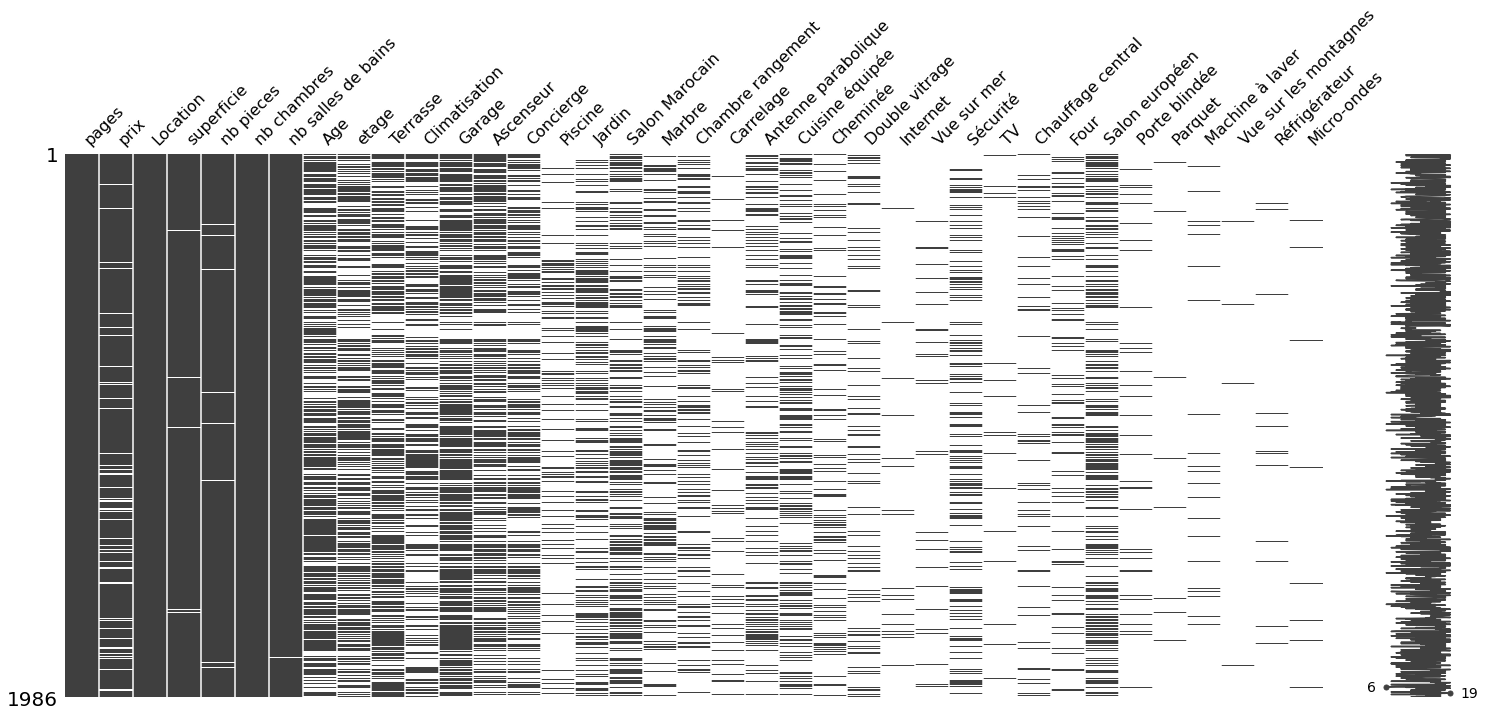

In [77]:
import missingno as msno
msno.matrix(data)

In [78]:
data.columns.values

array(['pages', 'prix', 'Location', 'superficie', 'nb pieces',
       'nb chambres', 'nb salles de bains', 'Age', 'etage', 'Terrasse',
       'Climatisation', 'Garage', 'Ascenseur', 'Concierge', 'Piscine',
       'Jardin', 'Salon Marocain', 'Marbre', 'Chambre rangement',
       'Carrelage', 'Antenne parabolique', 'Cuisine équipée', 'Cheminée',
       'Double vitrage', 'Internet', 'Vue sur mer', 'Sécurité', 'TV',
       'Chauffage central', 'Four', 'Salon européen', 'Porte blindée',
       'Parquet', 'Machine à laver', 'Vue sur les montagnes',
       'Réfrigérateur', 'Micro-ondes'], dtype=object)

In [79]:
data=data.drop(columns=['Age','etage','Climatisation','Concierge','Salon Marocain','Marbre', 
                        'Chambre rangement','Carrelage', 'Antenne parabolique', 'Cuisine équipée','Double vitrage',
                        'Sécurité', 'TV','Four', 'Salon européen', 'Porte blindée','Parquet', 'Machine à laver', 
                        'Vue sur les montagnes','Réfrigérateur', 'Micro-ondes','Internet', 'Vue sur mer'])

<AxesSubplot:>

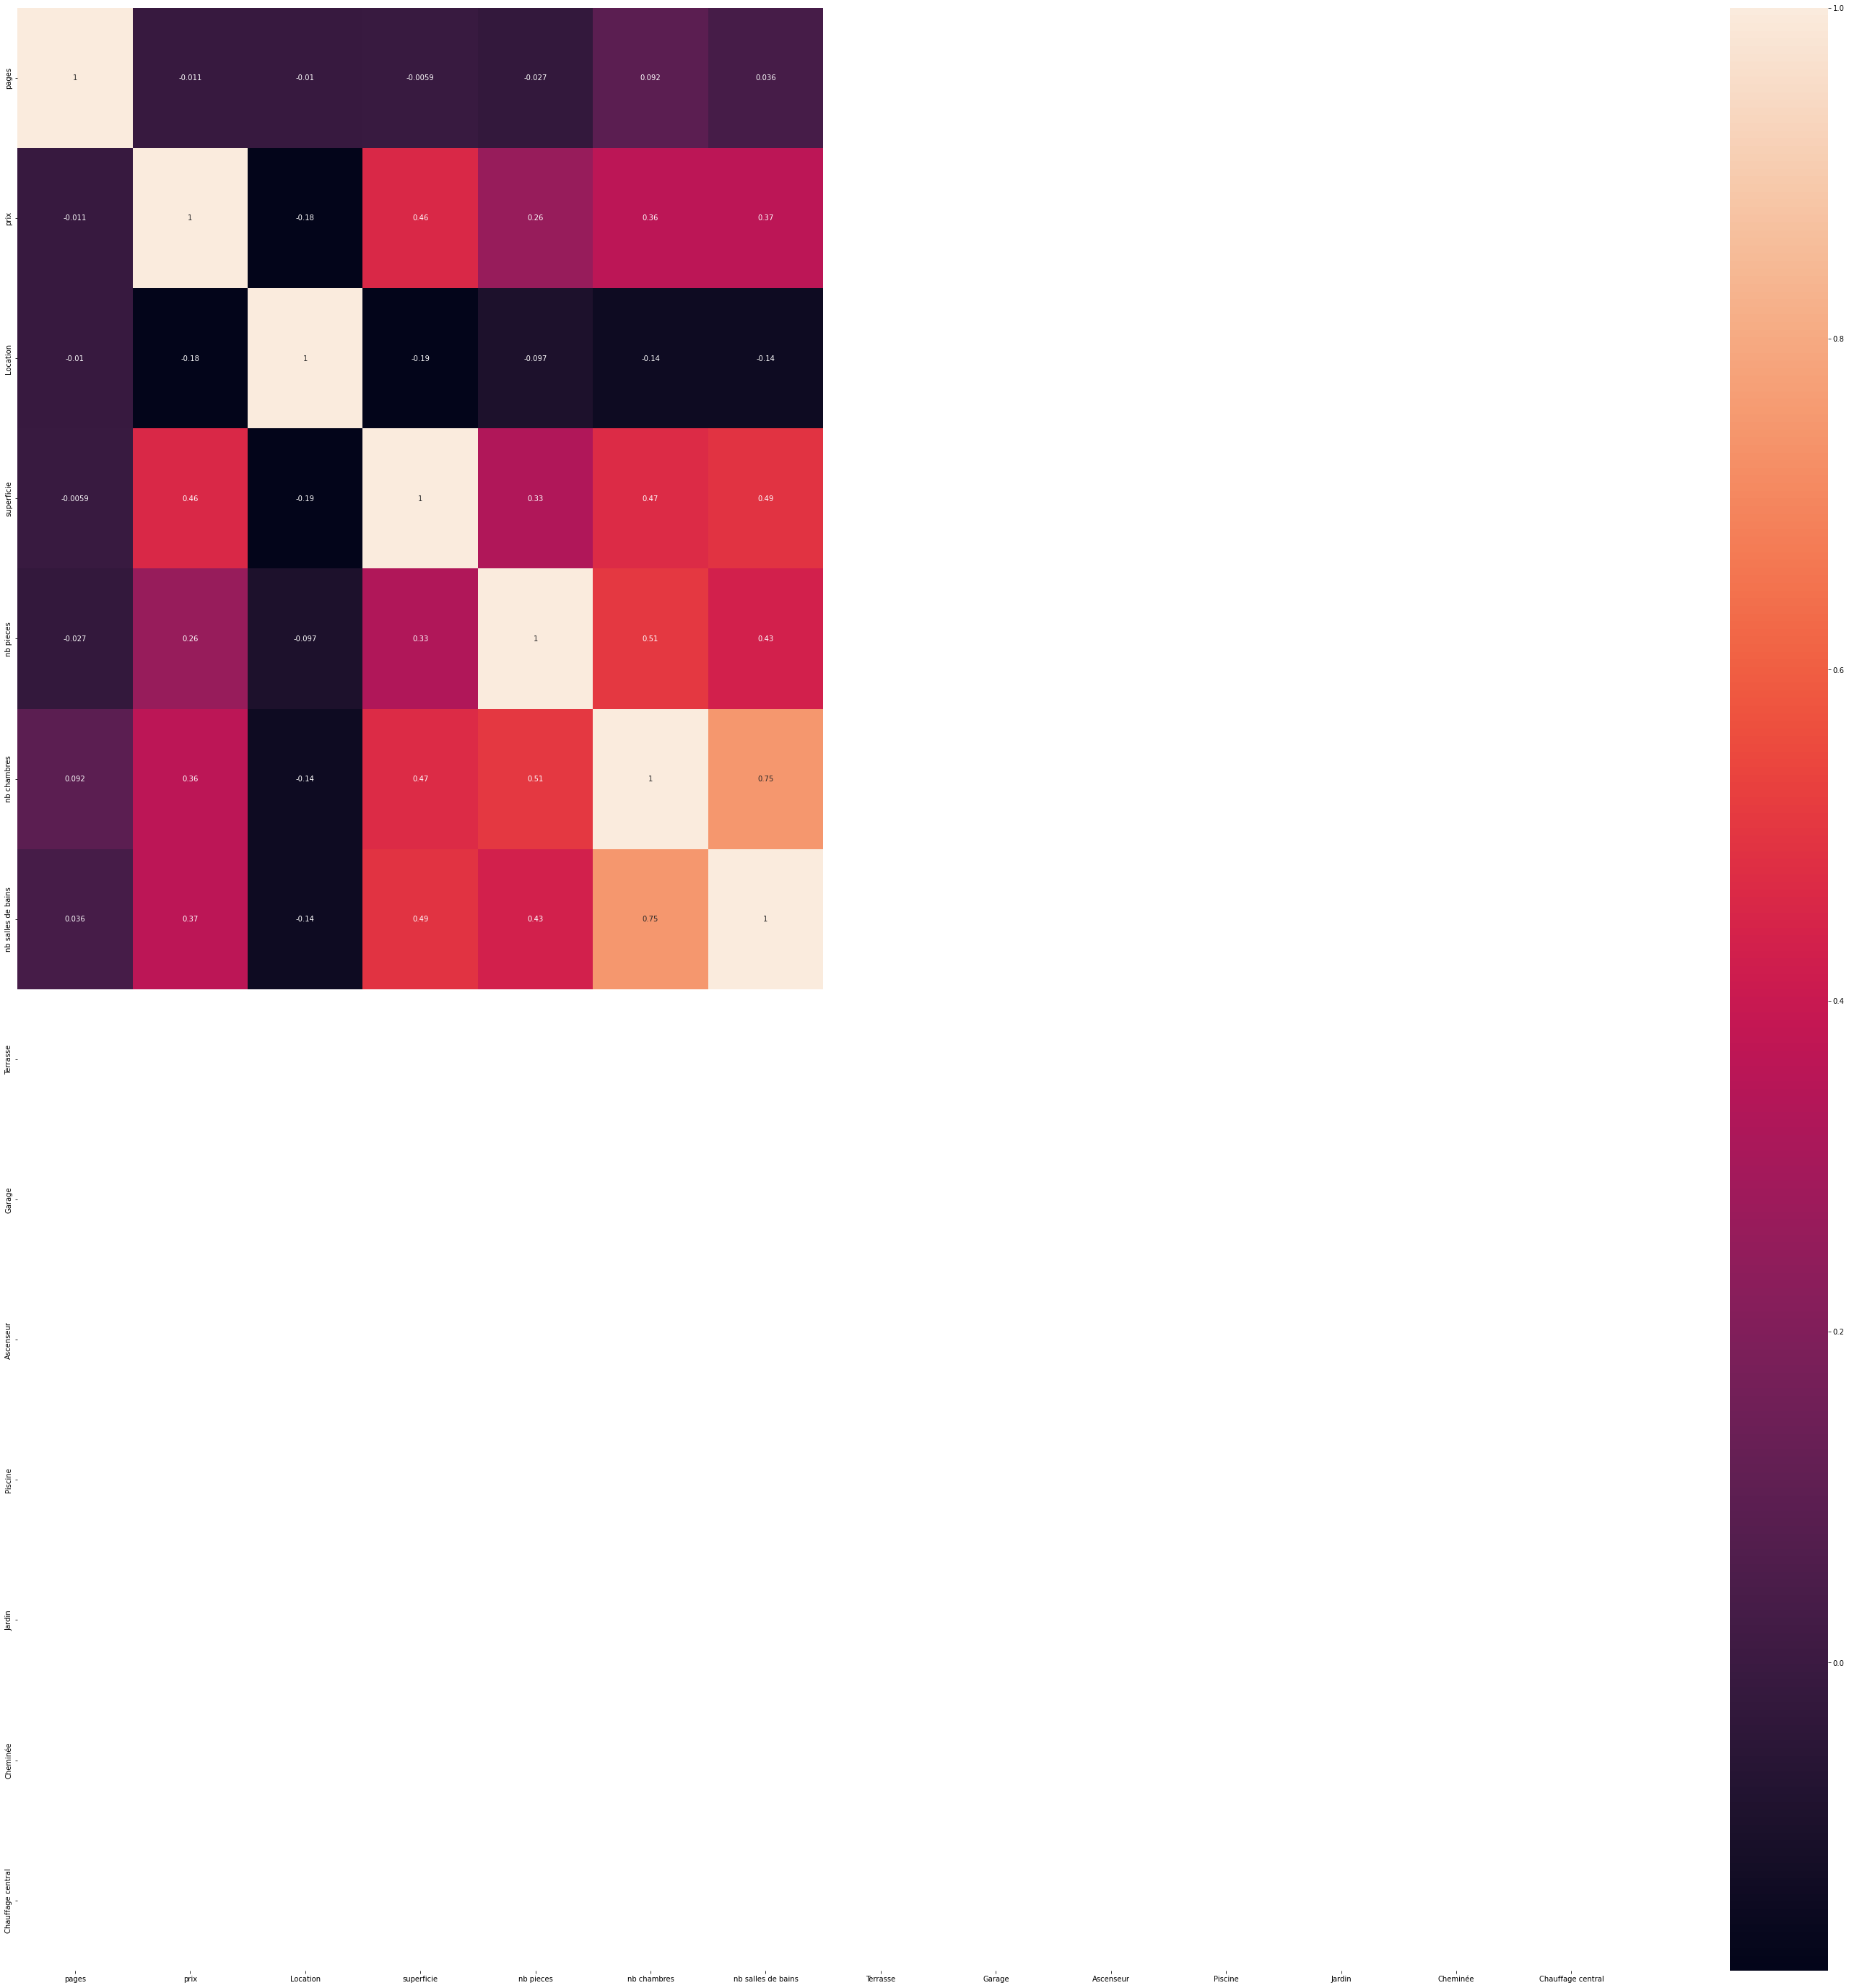

In [80]:
corr = data.corr()
plt.figure(figsize=(50,50))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

In [81]:
colonnes=['Terrasse', 'Garage', 'Ascenseur', 'Piscine',
       'Jardin', 'Cheminée', 'Chauffage central']
l={}
for j in data.index.values: 
    s=0
    for e in colonnes :
        if data.loc[j][e]==1:
            s=s+1
    l[j]=s

In [82]:
for i in data.index.values:
    data['Terrasse'][i]=l[i]

C:\Users\hp\AppData\Local\Temp/ipykernel_2416/2151820998.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Terrasse'][i]=l[i]


In [83]:
data=data.rename(columns={'Terrasse': 'rating'})

In [84]:
data.columns

Index(['pages', 'prix', 'Location', 'superficie', 'nb pieces', 'nb chambres',
       'nb salles de bains', 'rating', 'Garage', 'Ascenseur', 'Piscine',
       'Jardin', 'Cheminée', 'Chauffage central'],
      dtype='object')

In [85]:
data['rating'].unique()

array([2., 4., 0., 5., 3., 1., 6., 7.])

In [86]:
data=data.drop(columns=['Garage', 'Ascenseur', 'Piscine',
       'Jardin', 'Cheminée', 'Chauffage central'])

In [87]:
data.shape

(1986, 8)

In [88]:
import os
from quickda.explore_data import *
from quickda.clean_data import *
from quickda.explore_numeric import *
from quickda.explore_categoric import *
from quickda.explore_numeric_categoric import *

Scatterplot of rating versus prix


C:\Users\hp\anaconda3\lib\site-packages\quickda\explore_numeric_categoric.py:20: UserWarning:

Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.



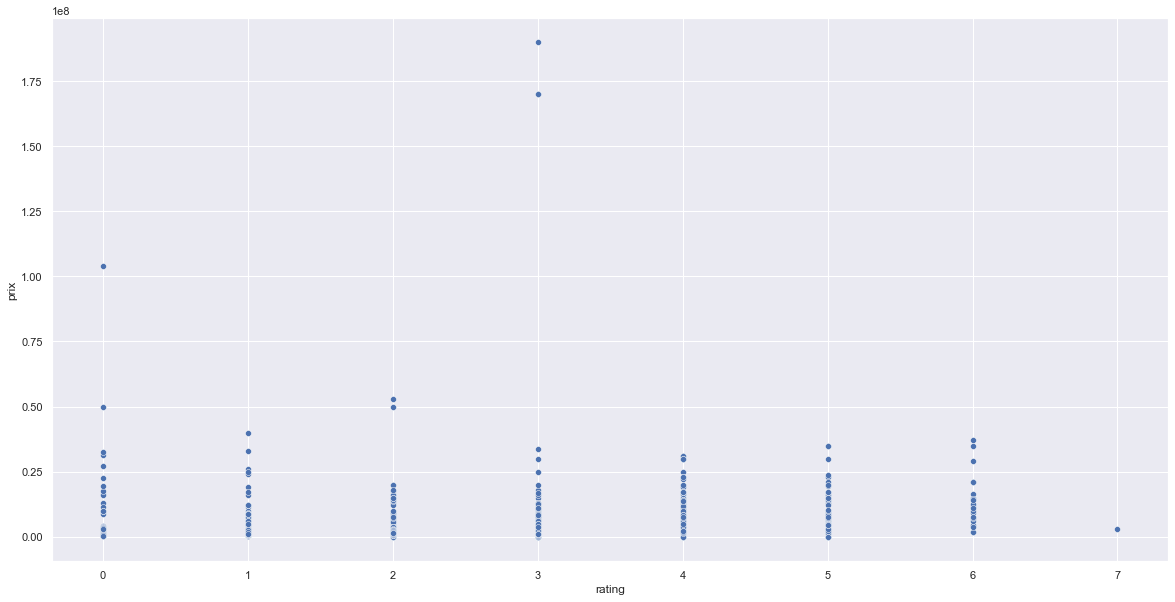

In [89]:
eda_numcat(data, x='rating', y='prix', method='relationship')

pages                   AxesSubplot(0.125,0.787927;0.0945122x0.0920732)
prix                  AxesSubplot(0.238415,0.787927;0.0945122x0.0920...
Location              AxesSubplot(0.351829,0.787927;0.0945122x0.0920...
superficie            AxesSubplot(0.465244,0.787927;0.0945122x0.0920...
nb pieces             AxesSubplot(0.578659,0.787927;0.0945122x0.0920...
nb chambres           AxesSubplot(0.692073,0.787927;0.0945122x0.0920...
nb salles de bains    AxesSubplot(0.805488,0.787927;0.0945122x0.0920...
rating                  AxesSubplot(0.125,0.677439;0.0945122x0.0920732)
dtype: object

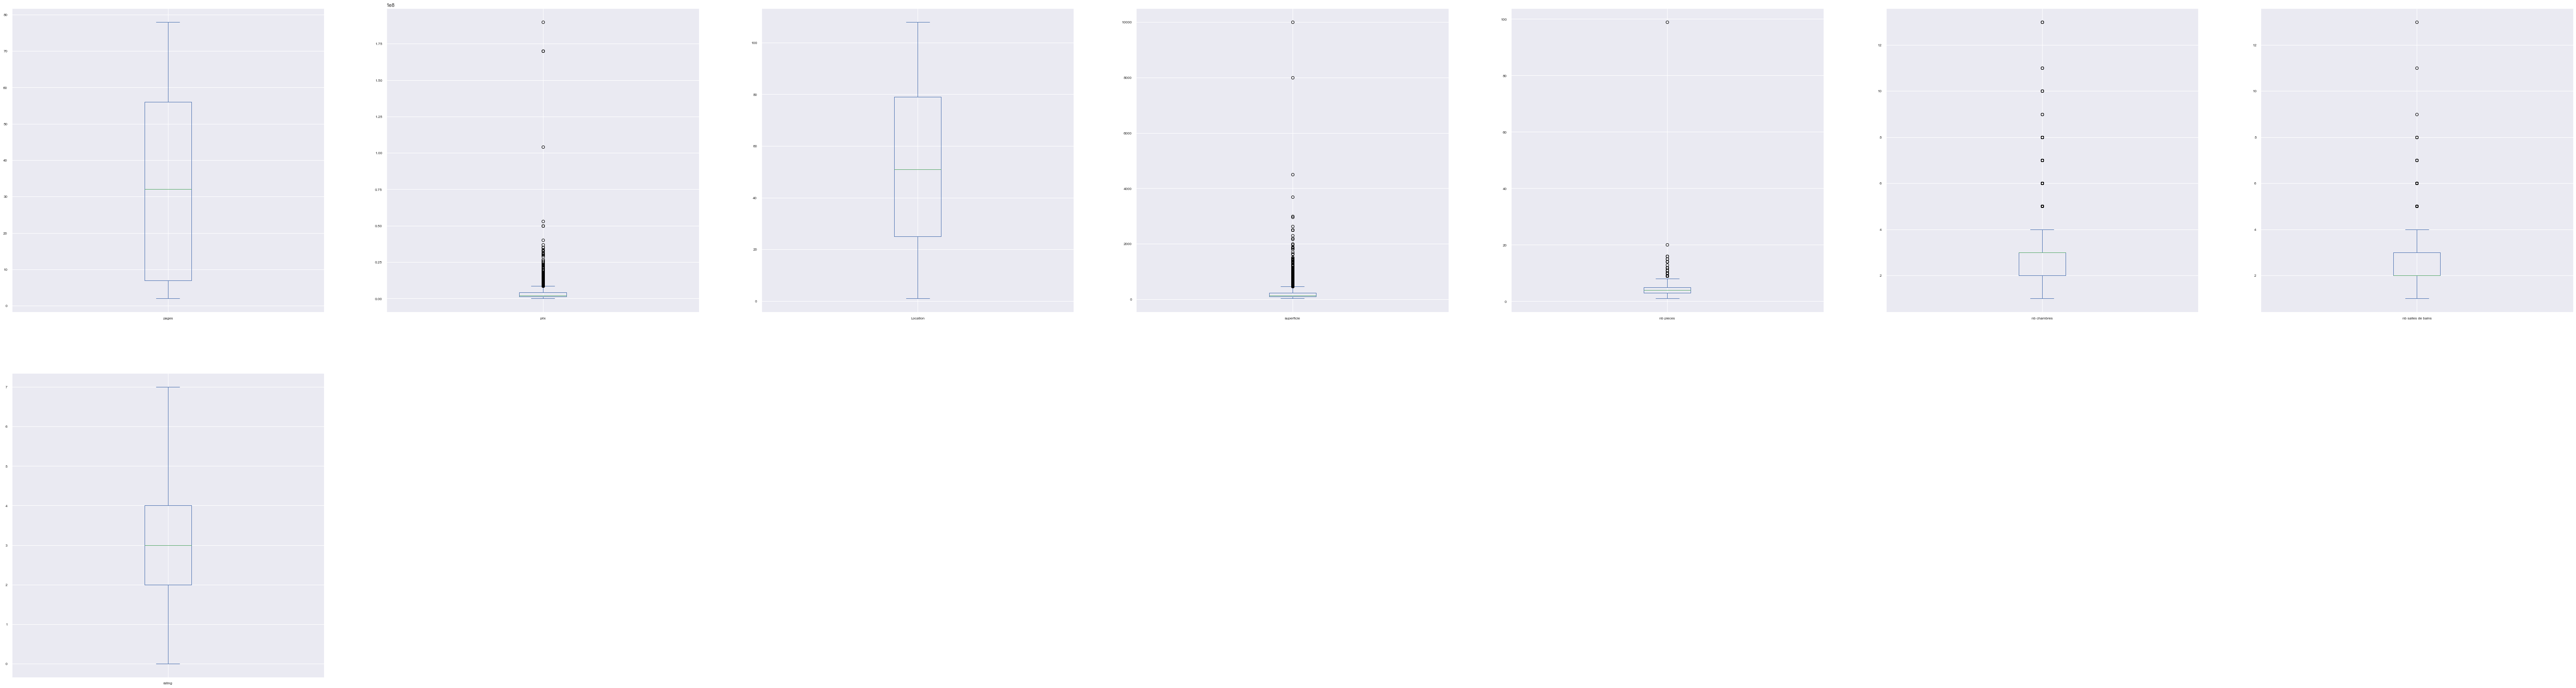

In [90]:
data.plot(kind='box', subplots=True, layout=(7,7), fontsize=8,figsize=(100,100))

In [91]:
data.isna().sum()/data.shape[0]

pages                 0.000000
prix                  0.082578
Location              0.000504
superficie            0.012588
nb pieces             0.016113
nb chambres           0.000000
nb salles de bains    0.000504
rating                0.000000
dtype: float64

In [92]:
#missing values of Location
data=data.drop(1789)

<AxesSubplot:>

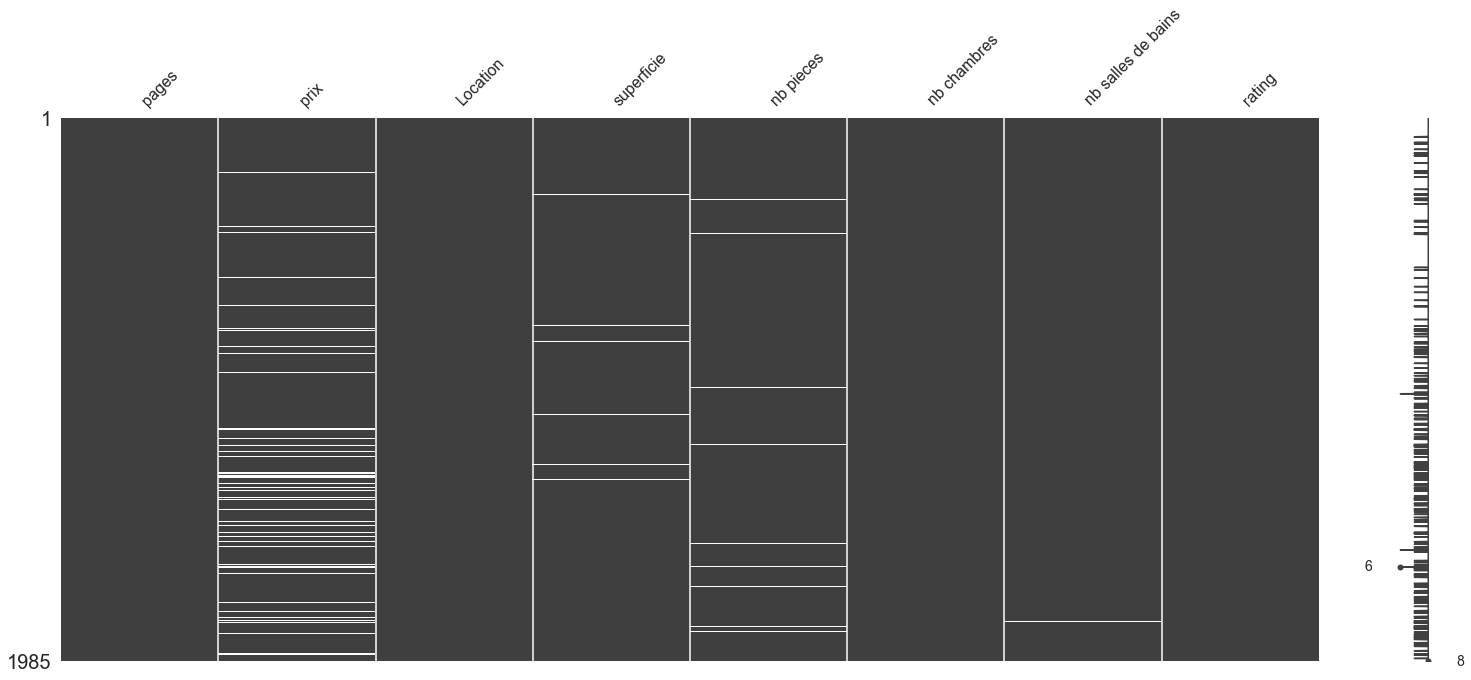

In [93]:
msno.matrix(data)

In [94]:
data.isna().sum()

pages                   0
prix                  164
Location                0
superficie             25
nb pieces              32
nb chambres             0
nb salles de bains      1
rating                  0
dtype: int64

In [95]:
data.shape

(1985, 8)

In [96]:
data.dropna(axis=0, how='any', inplace=True)

In [97]:
data.shape

(1766, 8)

<AxesSubplot:>

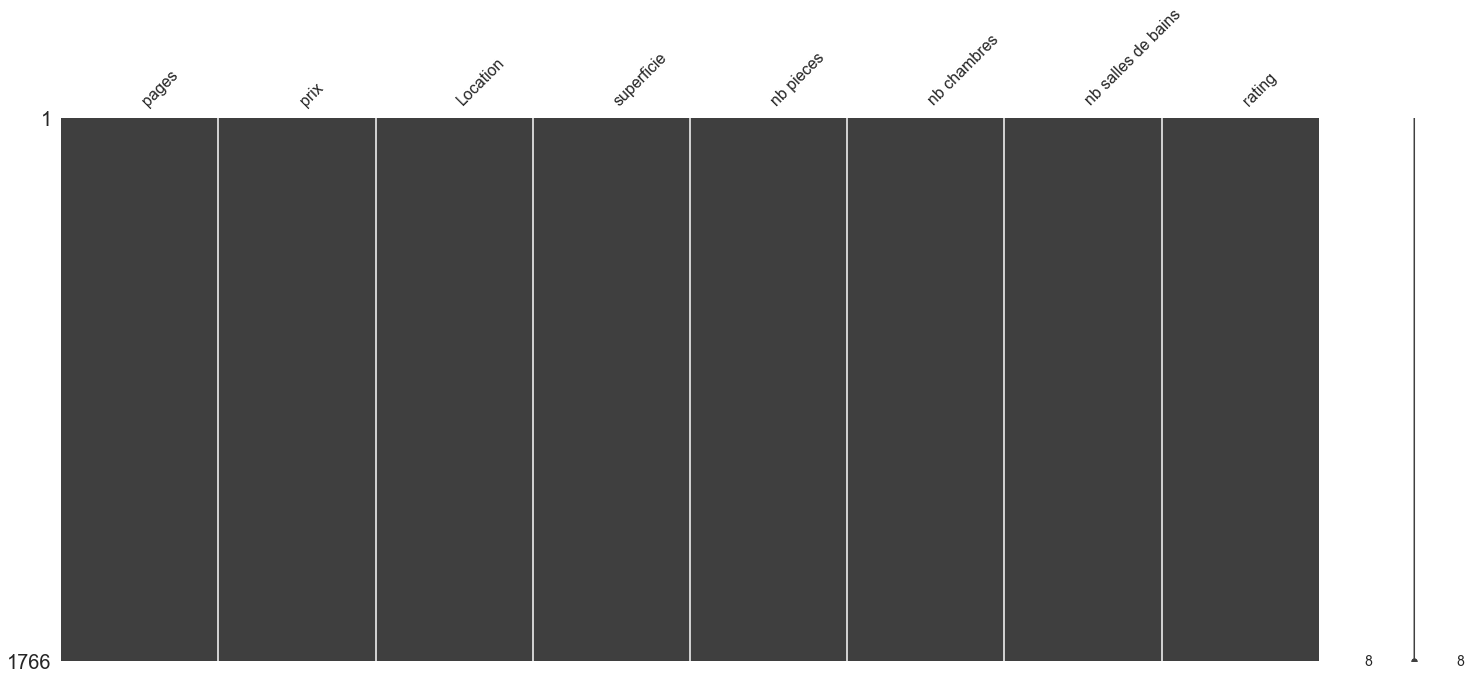

In [98]:
msno.matrix(data)

In [99]:
data.head()

pages       prix  Location  superficie  nb pieces  nb chambres  \
0      2  1850000.0      75.0       110.0        3.0            2   
1      5  2200000.0       3.0       154.0        5.0            3   
2      3  1202000.0      28.0        78.0        3.0            2   
3      6  5000000.0       3.0       219.0        8.0            5   
4      3  2300000.0      77.0       140.0        4.0            2   

   nb salles de bains  rating  
0                 1.0     2.0  
1                 2.0     4.0  
2                 1.0     0.0  
3                 4.0     5.0  
4                 2.0     2.0

In [100]:
data.describe()

pages          prix     Location    superficie    nb pieces  \
count  1766.000000  1.766000e+03  1766.000000   1766.000000  1766.000000   
mean     32.287656  4.299779e+06    52.902039    273.253681     4.602492   
std      24.881724  9.127742e+06    31.189107    461.200147     3.069446   
min       2.000000  7.500000e+03     1.000000     35.000000     1.000000   
25%       6.000000  1.250000e+06    26.000000     92.000000     3.000000   
50%      30.000000  2.000000e+06    51.000000    136.000000     4.000000   
75%      56.000000  4.287500e+06    79.750000    250.000000     6.000000   
max      78.000000  1.900000e+08   107.000000  10007.000000    99.000000   

       nb chambres  nb salles de bains       rating  
count  1766.000000         1766.000000  1766.000000  
mean      2.922990            2.323896     2.671008  
std       1.167435            1.131754     1.431308  
min       1.000000            1.000000     0.000000  
25%       2.000000            2.000000     2.000000  
50%       3.000000            2.000000     3.000000  
75%       3.000000            3.000000     4.000000  
max      13.000000           13.000000     7.000000

<AxesSubplot:>

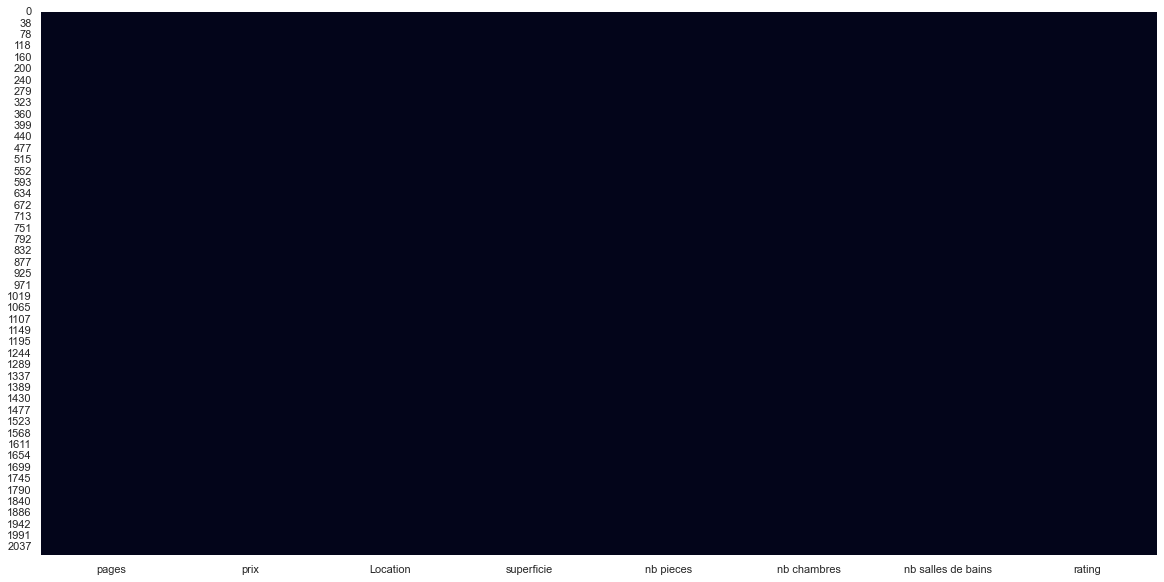

In [101]:
figsize=(200,200)
sns.heatmap(data.isnull(), cbar=False)

In [102]:
data.drop(['pages'], axis=1, inplace=True)

In [103]:
import os
from quickda.explore_data import *
from quickda.clean_data import *
from quickda.explore_numeric import *
from quickda.explore_categoric import *
from quickda.explore_numeric_categoric import *

EDA

In [104]:
%matplotlib inline
pd.set_option('display.max_rows', 2070)

In [105]:
explore(data, method="summarize")

dtypes  count  null_sum  null_pct  nunique     min  \
prix                float64   1766         0       0.0      499  7500.0   
Location            float64   1766         0       0.0       98     1.0   
superficie          float64   1766         0       0.0      425    35.0   
nb pieces           float64   1766         0       0.0       18     1.0   
nb chambres           int64   1766         0       0.0       11     1.0   
nb salles de bains  float64   1766         0       0.0       10     1.0   
rating              float64   1766         0       0.0        8     0.0   

                          25%        50%         75%          max  \
prix                1250000.0  2000000.0  4287500.00  190000000.0   
Location                 26.0       51.0       79.75        107.0   
superficie               92.0      136.0      250.00      10007.0   
nb pieces                 3.0        4.0        6.00         99.0   
nb chambres               2.0        3.0        3.00         13.0   
nb salles de bains        2.0        2.0        3.00         13.0   
rating                    2.0        3.0        4.00          7.0   

                           mean     median          std    skew  
prix                4299779.161  2000000.0  9127741.521  12.897  
Location                 52.902       51.0       31.189   0.026  
superficie              273.254      136.0      461.200   9.832  
nb pieces                 4.602        4.0        3.069  16.932  
nb chambres               2.923        3.0        1.167   1.555  
nb salles de bains        2.324        2.0        1.132   1.731  
rating                    2.671        3.0        1.431  -0.167

In [106]:
data.shape

(1766, 7)

In [107]:
data.duplicated().sum()

390

In [108]:
#Remove duplicate rows
data=clean(data, method="duplicates")

In [109]:
explore(data, method="summarize")

dtypes  count  null_sum  null_pct  nunique     min  \
prix                float64   1376         0       0.0      499  7500.0   
Location            float64   1376         0       0.0       98     1.0   
superficie          float64   1376         0       0.0      425    35.0   
nb pieces           float64   1376         0       0.0       18     1.0   
nb chambres           int64   1376         0       0.0       11     1.0   
nb salles de bains  float64   1376         0       0.0       10     1.0   
rating              float64   1376         0       0.0        8     0.0   

                          25%        50%         75%          max  \
prix                1283750.0  2103000.0  4600000.00  190000000.0   
Location                 25.0       43.0       79.00        107.0   
superficie               95.0      140.0      297.25      10007.0   
nb pieces                 3.0        4.0        6.00         99.0   
nb chambres               2.0        3.0        4.00         13.0   
nb salles de bains        2.0        2.0        3.00         13.0   
rating                    2.0        3.0        4.00          7.0   

                           mean     median          std    skew  
prix                4571936.299  2103000.0  9050439.988  12.353  
Location                 52.126       43.0       31.524   0.072  
superficie              296.575      140.0      505.421   9.380  
nb pieces                 4.717        4.0        3.340  16.753  
nb chambres               3.005        3.0        1.214   1.636  
nb salles de bains        2.390        2.0        1.168   1.767  
rating                    2.707        3.0        1.444  -0.173

In [110]:
data.shape

(1376, 7)

prix                    AxesSubplot(0.125,0.787927;0.0945122x0.0920732)
Location              AxesSubplot(0.238415,0.787927;0.0945122x0.0920...
superficie            AxesSubplot(0.351829,0.787927;0.0945122x0.0920...
nb pieces             AxesSubplot(0.465244,0.787927;0.0945122x0.0920...
nb chambres           AxesSubplot(0.578659,0.787927;0.0945122x0.0920...
nb salles de bains    AxesSubplot(0.692073,0.787927;0.0945122x0.0920...
rating                AxesSubplot(0.805488,0.787927;0.0945122x0.0920...
dtype: object

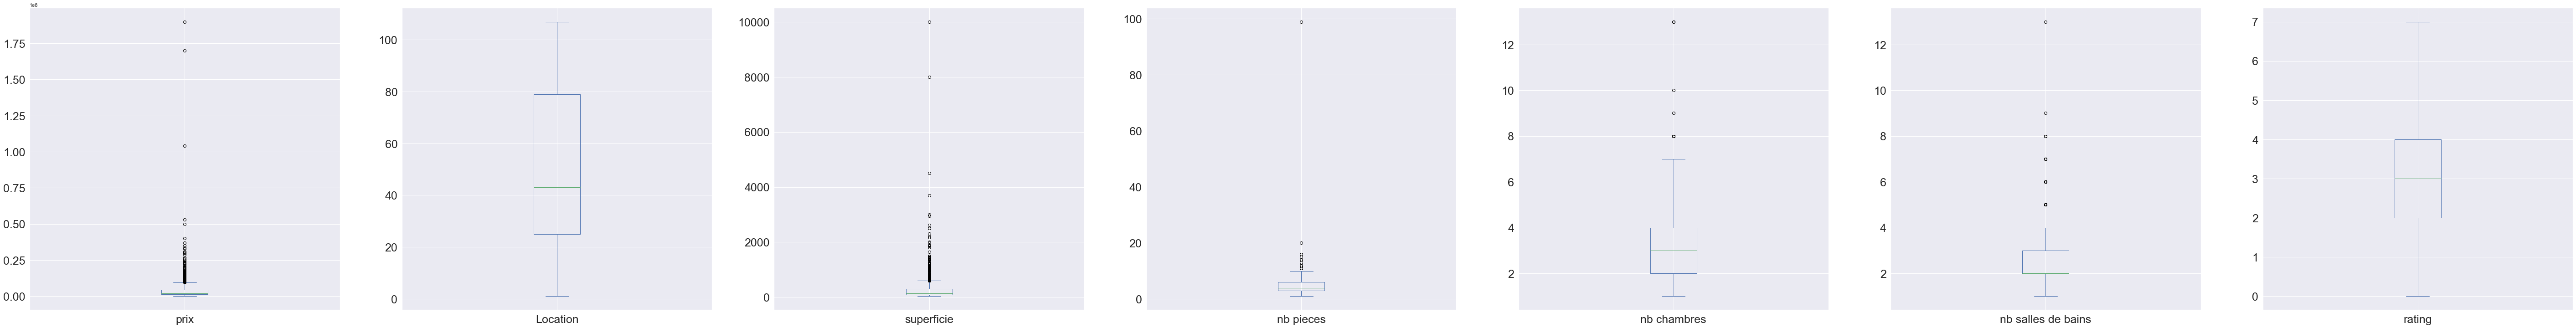

In [111]:
data.plot(kind='box', subplots=True, layout=(7,7), fontsize=25,figsize=(100,100))

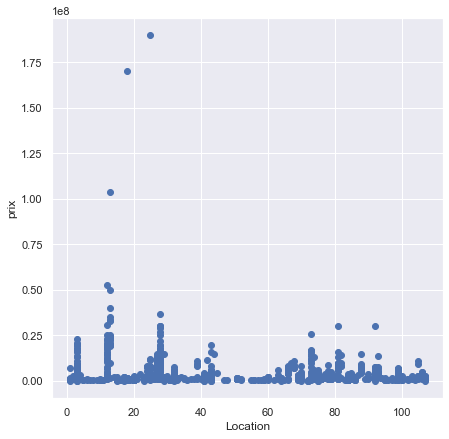

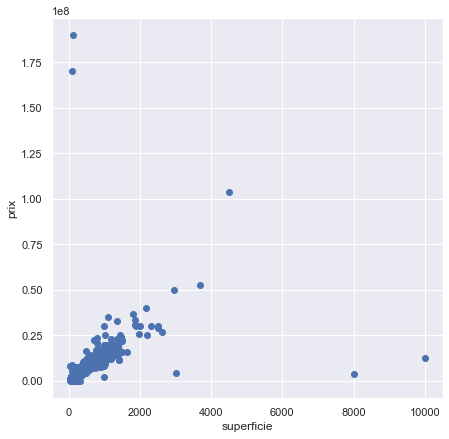

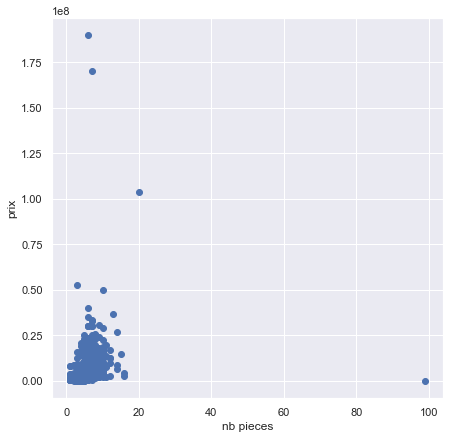

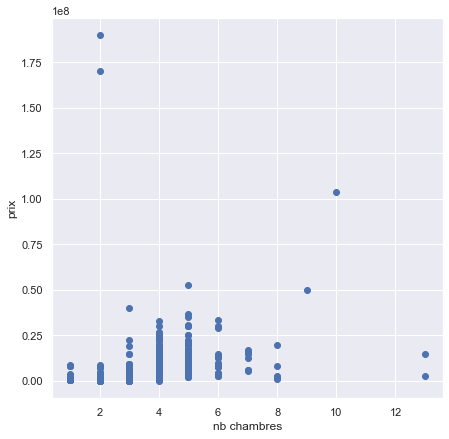

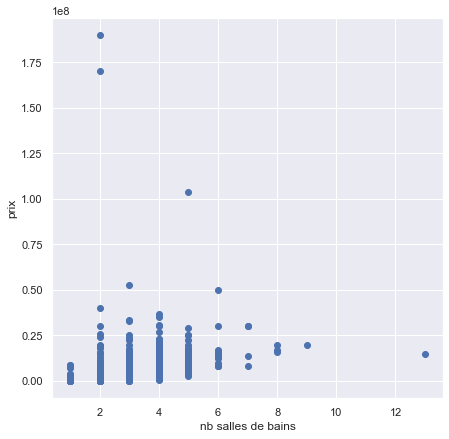

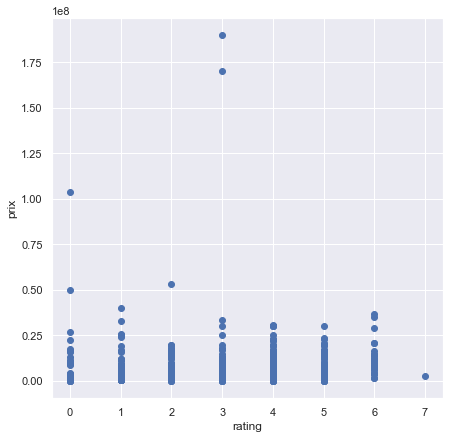

In [112]:
import matplotlib.pyplot as plt
for i in data.columns.values:
    if i !='prix':
        plt.figure(figsize=(7,7))
        plt.scatter(data[i],data['prix'])
        plt.xlabel(i)
        plt.ylabel('prix')

In [113]:
data['nb pieces'].unique()

array([ 3.,  5.,  8.,  4.,  6.,  2.,  7.,  1.,  9., 12., 10., 99., 16.,
       11., 15., 14., 20., 13.])

In [114]:
eda_num(data, method='correlation')

Correlation Analysis - Heatmap


C:\Users\hp\anaconda3\lib\site-packages\quickda\explore_numeric.py:30: FutureWarning:

this method is deprecated in favour of `Styler.format(precision=..)`



Outliers

In [115]:
def find_outliers_turkey(x):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr=q3-q1
    floor=q1-1.5*iqr
    ceilling=q3+1.5*iqr
    outlier_indices=list(x.index[(x<floor)|(x>ceilling)])
    outlier_values=list(x[outlier_indices])
    return (outlier_indices, outlier_values)


turkey={}
turkeyindex={}
for x in data.columns:
        turkey[x]=find_outliers_turkey(data[x])[1]
        turkeyindex[x]=find_outliers_turkey(data[x])[0]

new_tur={}
newturkeyindex={}
for  i in turkey.keys():
    if turkey[i]!=[]:
        new_tur[i]=turkey[i]
        newturkeyindex[i]=turkeyindex[i]
turkeyindex=newturkeyindex
turkey=new_tur
turkeyindex

{'prix': [8,
  16,
  40,
  96,
  122,
  179,
  183,
  196,
  417,
  433,
  440,
  532,
  543,
  555,
  557,
  593,
  601,
  616,
  617,
  618,
  624,
  633,
  643,
  647,
  653,
  654,
  655,
  656,
  658,
  660,
  667,
  669,
  670,
  674,
  682,
  683,
  685,
  688,
  703,
  707,
  709,
  718,
  722,
  732,
  740,
  753,
  757,
  759,
  765,
  768,
  770,
  772,
  777,
  781,
  786,
  787,
  792,
  809,
  811,
  813,
  816,
  821,
  854,
  864,
  869,
  875,
  883,
  895,
  896,
  908,
  1009,
  1021,
  1058,
  1084,
  1090,
  1125,
  1135,
  1136,
  1137,
  1186,
  1206,
  1221,
  1225,
  1230,
  1260,
  1277,
  1280,
  1285,
  1291,
  1301,
  1307,
  1318,
  1349,
  1371,
  1381,
  1392,
  1401,
  1406,
  1417,
  1423,
  1427,
  1437,
  1444,
  1450,
  1456,
  1459,
  1462,
  1463,
  1467,
  1481,
  1487,
  1489,
  1491,
  1515,
  1529,
  1563,
  1628,
  1727,
  1806,
  1814,
  1818,
  1824,
  1832,
  1833,
  1837,
  1855,
  1856,
  1861,
  1872,
  1901,
  1926,
  1928,
  1931,
  1

In [116]:
l=[]
for  i in turkeyindex.keys():
    l=l+turkeyindex[i]
l= list(set(l))

data.drop(l,axis=0,inplace=True)

In [117]:
data = data.drop(data[data['prix'] < 50000].index)

In [118]:
explore(data, method="summarize")

dtypes  count  null_sum  null_pct  nunique       min  \
prix                float64   1149         0       0.0      417  240000.0   
Location            float64   1149         0       0.0       92       1.0   
superficie          float64   1149         0       0.0      296      35.0   
nb pieces           float64   1149         0       0.0       10       1.0   
nb chambres           int64   1149         0       0.0        7       1.0   
nb salles de bains  float64   1149         0       0.0        4       1.0   
rating              float64   1149         0       0.0        8       0.0   

                          25%        50%        75%        max         mean  \
prix                1200000.0  1850000.0  3000000.0  9500000.0  2511640.598   
Location                 26.0       68.0       82.0      107.0       55.451   
superficie               90.0      126.0      188.0      600.0      162.564   
nb pieces                 3.0        4.0        5.0       10.0        4.142   
nb chambres               2.0        3.0        3.0        7.0        2.709   
nb salles de bains        2.0        2.0        2.0        4.0        2.080   
rating                    2.0        3.0        4.0        7.0        2.561   

                       median          std   skew  
prix                1850000.0  1929740.979  1.602  
Location                 68.0       31.346 -0.099  
superficie              126.0      111.923  1.784  
nb pieces                 4.0        1.656  1.064  
nb chambres               3.0        0.916  0.593  
nb salles de bains        2.0        0.781  0.496  
rating                    3.0        1.366 -0.216

In [119]:
data = data.drop(data[data['superficie'] == 8000].index)

In [120]:
data = data.drop(data[data['superficie'] ==10007 ].index)

In [121]:
d

{75: 'Maârif',
 3: 'Ain Diab',
 28: 'Californie ',
 77: 'Moulay Youssef ',
 92: 'Racine ',
 24: 'Bourgogne Ouest ',
 64: 'La Gironde ',
 42: 'Franceville ',
 70: 'Les princesses ',
 18: 'Belvédère ',
 15: 'Aïn Sebaâ ',
 31: 'City Dar Es Salaam ',
 95: 'Roches Noires ',
 99: 'Sidi Maarouf ',
 88: 'Polo ',
 56: 'Hay Moulay Rachid 1 ',
 13: 'Anfa Supérieur ',
 84: 'Oulfa ',
 69: 'Les Hôpitaux ',
 43: 'Gauthier ',
 23: 'Bourgogne Est ',
 100: 'Sidi Moumen ',
 20: 'Bernoussi ',
 85: 'Palmier ',
 105: 'Tantonville ',
 39: 'El Manar - El Hank ',
 12: 'Anfa ',
 73: 'Longchamps (Hay Al Hanâa) ',
 8: 'Al Madina Aljadida ',
 107: 'Val Fleury ',
 93: 'Racine Extension ',
 33: 'Derb Ghalef ',
 72: 'Lissasfa ',
 66: 'Laymoune ',
 51: 'Hay Hassani ',
 29: 'Centre Ville ',
 81: 'Oasis ',
 82: 'Oasis sud ',
 41: 'Ferme Bretonne (Hay Arraha) ',
 106: "Triangle d'Or ",
 90: 'Quartier Bachkou ',
 6: 'Al Hadika ',
 9: 'Al Qods ',
 32: 'Dar Bouazza',
 102: 'Sidi Rahal',
 25: 'Bouskoura',
 98: 'Sidi Bouzid',

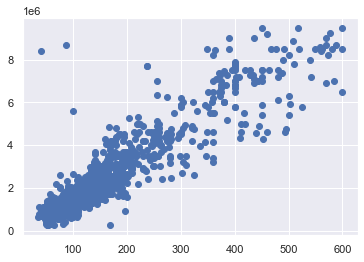

In [122]:
plt.scatter(data['superficie'],data['prix'])

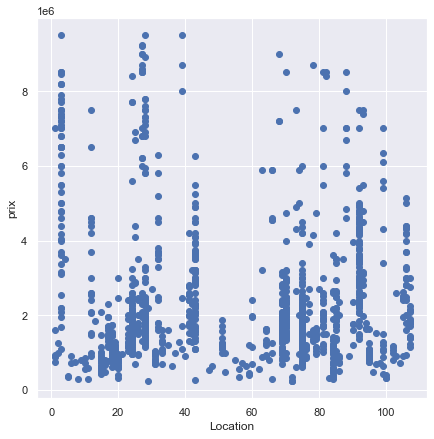

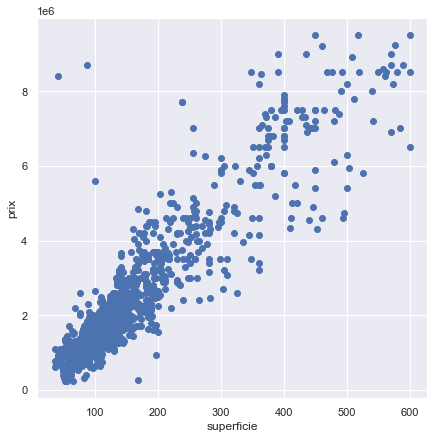

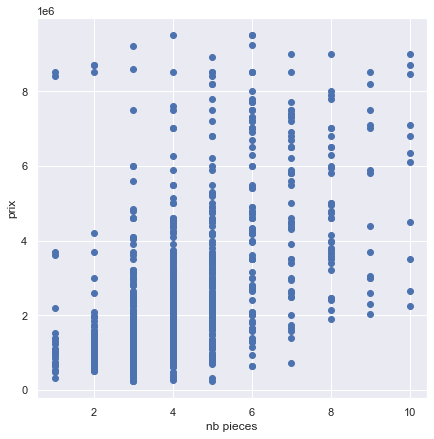

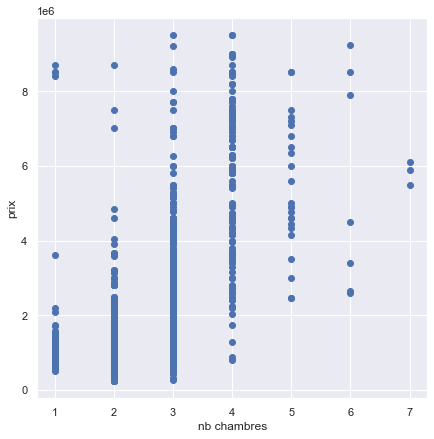

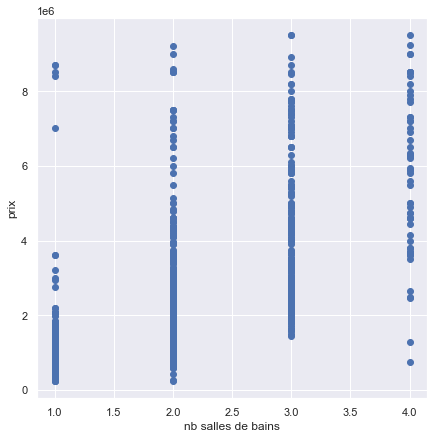

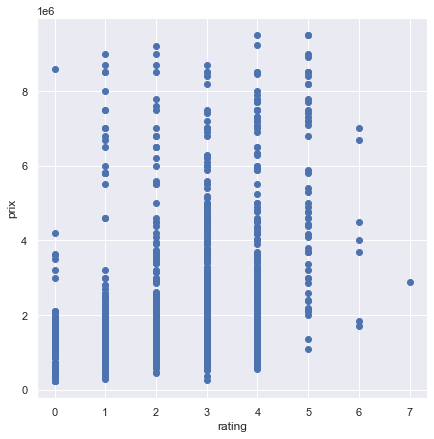

In [123]:
for i in data.columns.values:
    if i !='prix':
        plt.figure(figsize=(7,7))
        plt.scatter(data[i],data['prix'])
        plt.xlabel(i)
        plt.ylabel('prix')

In [124]:
explore(data, method="summarize")

dtypes  count  null_sum  null_pct  nunique       min  \
prix                float64   1149         0       0.0      417  240000.0   
Location            float64   1149         0       0.0       92       1.0   
superficie          float64   1149         0       0.0      296      35.0   
nb pieces           float64   1149         0       0.0       10       1.0   
nb chambres           int64   1149         0       0.0        7       1.0   
nb salles de bains  float64   1149         0       0.0        4       1.0   
rating              float64   1149         0       0.0        8       0.0   

                          25%        50%        75%        max         mean  \
prix                1200000.0  1850000.0  3000000.0  9500000.0  2511640.598   
Location                 26.0       68.0       82.0      107.0       55.451   
superficie               90.0      126.0      188.0      600.0      162.564   
nb pieces                 3.0        4.0        5.0       10.0        4.142   
nb chambres               2.0        3.0        3.0        7.0        2.709   
nb salles de bains        2.0        2.0        2.0        4.0        2.080   
rating                    2.0        3.0        4.0        7.0        2.561   

                       median          std   skew  
prix                1850000.0  1929740.979  1.602  
Location                 68.0       31.346 -0.099  
superficie              126.0      111.923  1.784  
nb pieces                 4.0        1.656  1.064  
nb chambres               3.0        0.916  0.593  
nb salles de bains        2.0        0.781  0.496  
rating                    3.0        1.366 -0.216

In [125]:
eda_num(data, method='correlation')

Correlation Analysis - Heatmap


C:\Users\hp\anaconda3\lib\site-packages\quickda\explore_numeric.py:30: FutureWarning:

this method is deprecated in favour of `Styler.format(precision=..)`



In [126]:
data.shape

(1149, 7)

Scatterplot of superficie versus prix


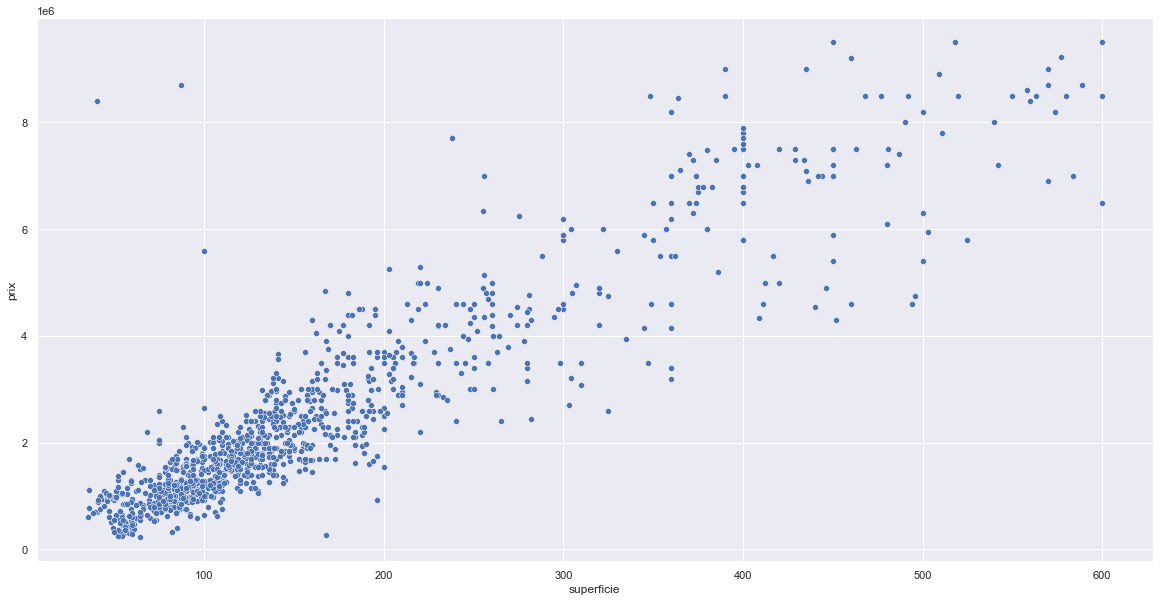

In [127]:
eda_numcat(data, x='superficie', y='prix', method='relationship')

In [128]:
L=data['prix']/data['superficie']

In [129]:
colonne=pd.DataFrame(L, columns=['prix/m²'])

In [130]:
colonne.head()

prix/m²
0  16818.181818
1  14285.714286
2  15410.256410
3  22831.050228
4  16428.571429

In [131]:
data.shape

(1149, 7)

In [132]:
data=pd.concat([data, colonne], axis=1)

In [133]:
data.head()

prix  Location  superficie  nb pieces  nb chambres  \
0  1850000.0      75.0       110.0        3.0            2   
1  2200000.0       3.0       154.0        5.0            3   
2  1202000.0      28.0        78.0        3.0            2   
3  5000000.0       3.0       219.0        8.0            5   
4  2300000.0      77.0       140.0        4.0            2   

   nb salles de bains  rating       prix/m²  
0                 1.0     2.0  16818.181818  
1                 2.0     4.0  14285.714286  
2                 1.0     0.0  15410.256410  
3                 4.0     5.0  22831.050228  
4                 2.0     2.0  16428.571429

Scatterplot of Location versus prix/m²


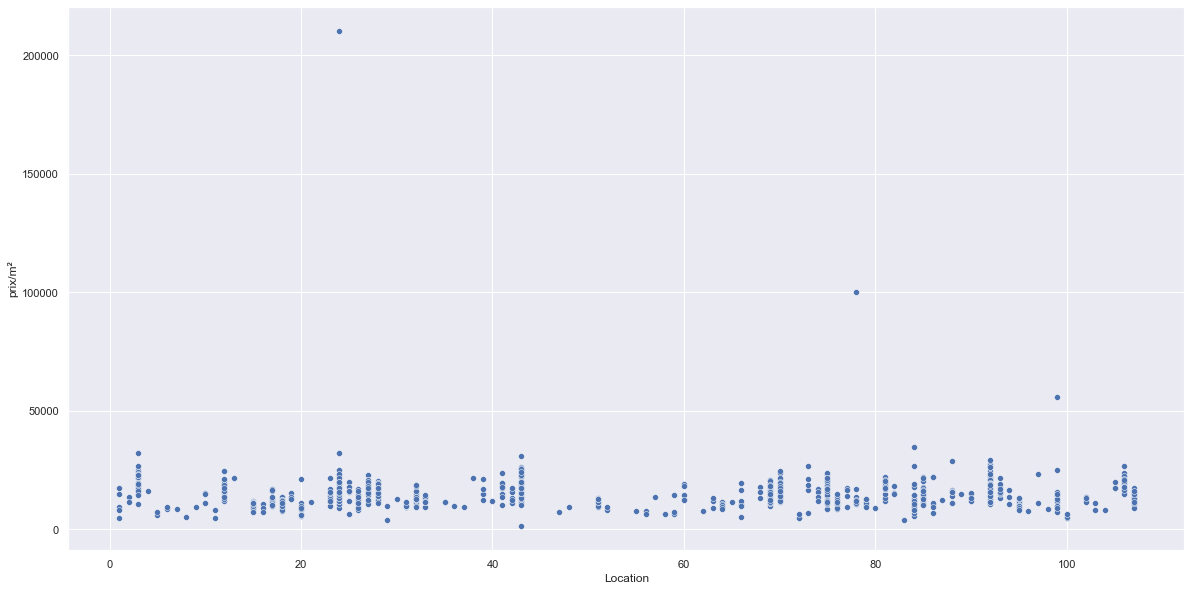

In [134]:
eda_numcat(data, x='Location', y='prix/m²', 
            method='relationship')

In [135]:
data[data['prix/m²'] >=50000]

prix  Location  superficie  nb pieces  nb chambres  \
18    8400000.0      24.0        40.0        1.0            1   
1015  8700000.0      78.0        87.0        2.0            2   
1621  5600000.0      99.0       100.0        3.0            5   

      nb salles de bains  rating   prix/m²  
18                   1.0     3.0  210000.0  
1015                 1.0     2.0  100000.0  
1621                 4.0     3.0   56000.0

In [136]:
data = data.drop(data[data['prix/m²'] >=50000].index)

In [137]:
data.shape

(1146, 8)

Scatterplot of superficie versus prix


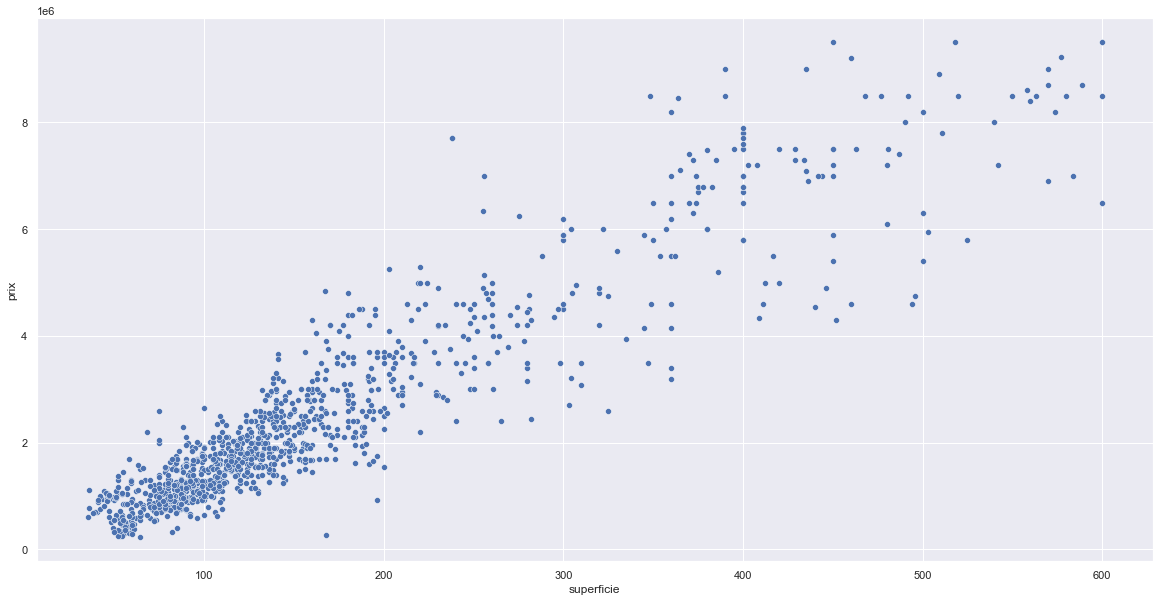

In [138]:
eda_numcat(data, x='superficie', y='prix', 
            method='relationship')

In [139]:
eda_num(data, method='correlation')

Correlation Analysis - Heatmap


C:\Users\hp\anaconda3\lib\site-packages\quickda\explore_numeric.py:30: FutureWarning:

this method is deprecated in favour of `Styler.format(precision=..)`



In [140]:
data.head()

prix  Location  superficie  nb pieces  nb chambres  \
0  1850000.0      75.0       110.0        3.0            2   
1  2200000.0       3.0       154.0        5.0            3   
2  1202000.0      28.0        78.0        3.0            2   
3  5000000.0       3.0       219.0        8.0            5   
4  2300000.0      77.0       140.0        4.0            2   

   nb salles de bains  rating       prix/m²  
0                 1.0     2.0  16818.181818  
1                 2.0     4.0  14285.714286  
2                 1.0     0.0  15410.256410  
3                 4.0     5.0  22831.050228  
4                 2.0     2.0  16428.571429

Feature Importance in the prediction of prix


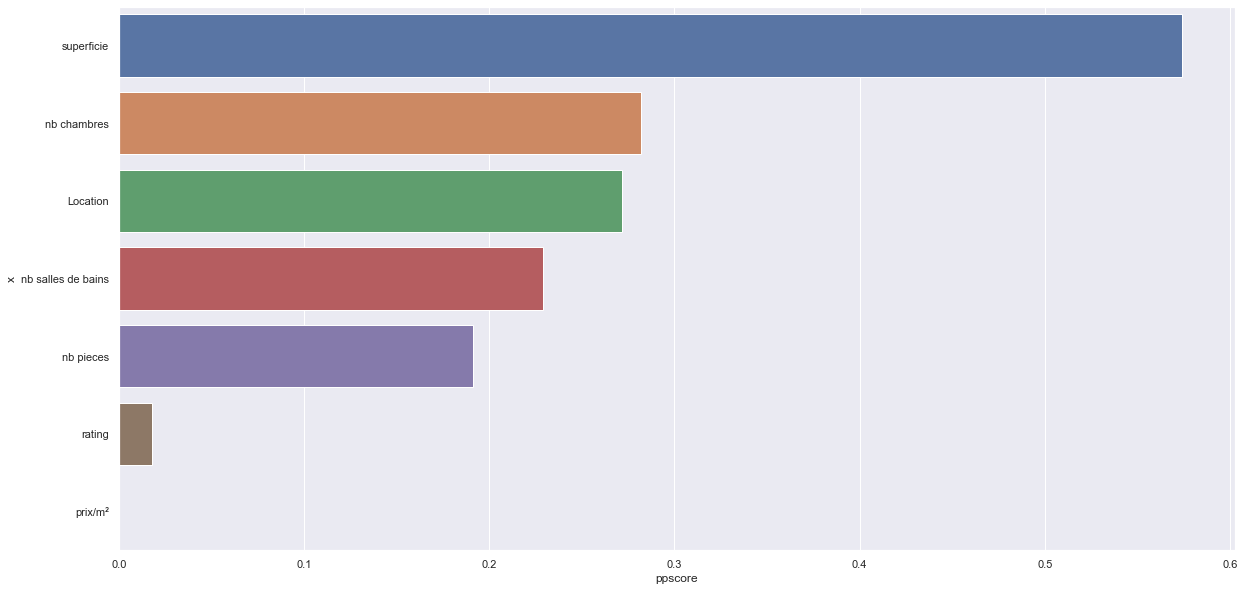

In [141]:
eda_numcat(data, x="prix")

In [142]:
data.groupby('Location')['prix/m²'].mean().values

array([11000.50129771, 12540.60469765, 18831.12359507, 16203.7037037 ,
        6557.69230769,  8973.21428571,  8426.96629213,  5272.72727273,
        9302.3255814 , 13795.69653573,  6559.52380952, 17624.19209003,
       21511.62790698, 10282.34333269,  8946.0547504 , 12911.59535534,
       11333.70304643, 13363.81967817,  9309.76024501, 11728.39506173,
       14100.72678044, 16855.02624144, 14981.28719399, 12084.75953816,
       16706.19583019, 15522.81829767,  6875.        , 12857.14285714,
        9954.65506013, 14393.60146104, 12057.12420495, 11580.6384019 ,
       10000.        ,  9615.38461538, 21694.91525424, 15871.23312253,
       12000.        , 17969.82047198, 14392.68671586, 18006.59218335,
        7500.        ,  9411.76470588, 11630.19342574,  8891.02564103,
        7843.1372549 ,  6981.40900196, 13584.90566038,  6400.        ,
        9484.12698413, 15325.82021565,  7777.77777778, 11361.11111111,
       10097.13541951, 11428.57142857, 12986.86149335, 15573.55511636,
      

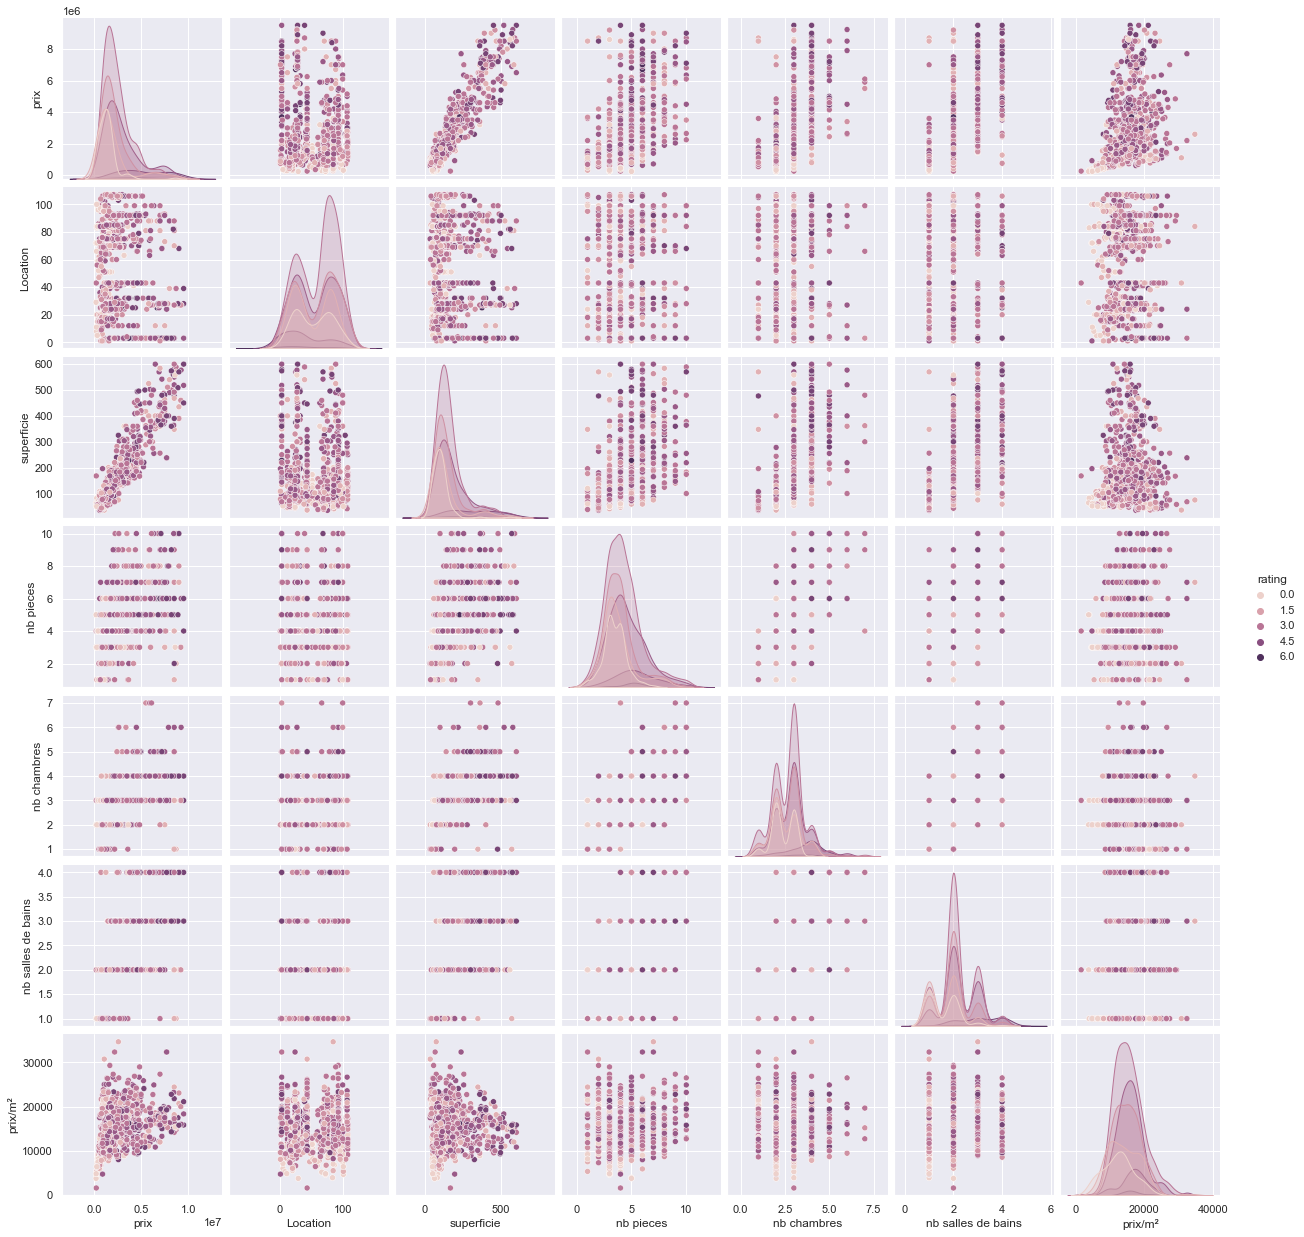

In [143]:
# Import libraries
## Basic libs
import pandas as pd
import numpy as np
import warnings
## Building Model
from sklearn import linear_model
from scipy import stats
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
## Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#sns.set_palette('colorblind')
#sns.pairplot(data=data, height=3)
sns.pairplot(data, hue="rating")
#rrr

In [144]:
data.head()

prix  Location  superficie  nb pieces  nb chambres  \
0  1850000.0      75.0       110.0        3.0            2   
1  2200000.0       3.0       154.0        5.0            3   
2  1202000.0      28.0        78.0        3.0            2   
3  5000000.0       3.0       219.0        8.0            5   
4  2300000.0      77.0       140.0        4.0            2   

   nb salles de bains  rating       prix/m²  
0                 1.0     2.0  16818.181818  
1                 2.0     4.0  14285.714286  
2                 1.0     0.0  15410.256410  
3                 4.0     5.0  22831.050228  
4                 2.0     2.0  16428.571429

In [145]:
eda_num(data, method='correlation')

Correlation Analysis - Heatmap


C:\Users\hp\anaconda3\lib\site-packages\quickda\explore_numeric.py:30: FutureWarning:

this method is deprecated in favour of `Styler.format(precision=..)`



In [146]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [147]:
X=data[['Location','prix/m²']]

In [148]:
x=data.groupby('Location')['prix/m²'].mean().values
x=pd.DataFrame(x,columns=['prix/m²'])

In [149]:
x.index=data.groupby('Location')['prix/m²'].mean().index
x

prix/m²
Location              
1.0       11000.501298
2.0       12540.604698
3.0       18831.123595
4.0       16203.703704
5.0        6557.692308
6.0        8973.214286
7.0        8426.966292
8.0        5272.727273
9.0        9302.325581
10.0      13795.696536
11.0       6559.523810
12.0      17624.192090
13.0      21511.627907
15.0      10282.343333
16.0       8946.054750
17.0      12911.595355
18.0      11333.703046
19.0      13363.819678
20.0       9309.760245
21.0      11728.395062
23.0      14100.726780
24.0      16855.026241
25.0      14981.287194
26.0      12084.759538
27.0      16706.195830
28.0      15522.818298
29.0       6875.000000
30.0      12857.142857
31.0       9954.655060
32.0      14393.601461
33.0      12057.124205
35.0      11580.638402
36.0      10000.000000
37.0       9615.384615
38.0      21694.915254
39.0      15871.233123
40.0      12000.000000
41.0      17969.820472
42.0      14392.686716
43.0      18006.592183
47.0       7500.000000
48.0       9411.764706
51.0      11630.193426
52.0       8891.025641
55.0       7843.137255
56.0       6981.409002
57.0      13584.905660
58.0       6400.000000
59.0       9484.126984
60.0      15325.820216
62.0       7777.777778
63.0      11361.111111
64.0      10097.135420
65.0      11428.571429
66.0      12986.861493
68.0      15573.555116
69.0      14511.900103
70.0      15764.307533
72.0       5189.519164
73.0      18046.195652
74.0      14634.543663
75.0      15825.357073
76.0      11500.269946
77.0      14859.315227
78.0      12808.652097
79.0      11452.094181
80.0       8910.891089
81.0      18591.511275
82.0      16245.011086
83.0       3902.439024
84.0      12996.168584
85.0      15005.996569
86.0      13196.788693
87.0      12500.000000
88.0      16206.378877
89.0      15000.000000
90.0      13405.636097
92.0      17938.075381
93.0      16428.076608
94.0      13626.310273
95.0      10634.760693
96.0       7868.852459
97.0      17059.659091
98.0       8470.588235
99.0      12494.725838
100.0      5460.130719
102.0     12656.565393
103.0      9555.555556
104.0      8111.111111
105.0     17813.735178
106.0     19131.050347
107.0     13338.155989

C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



Text(0, 0.5, 'WCSS')

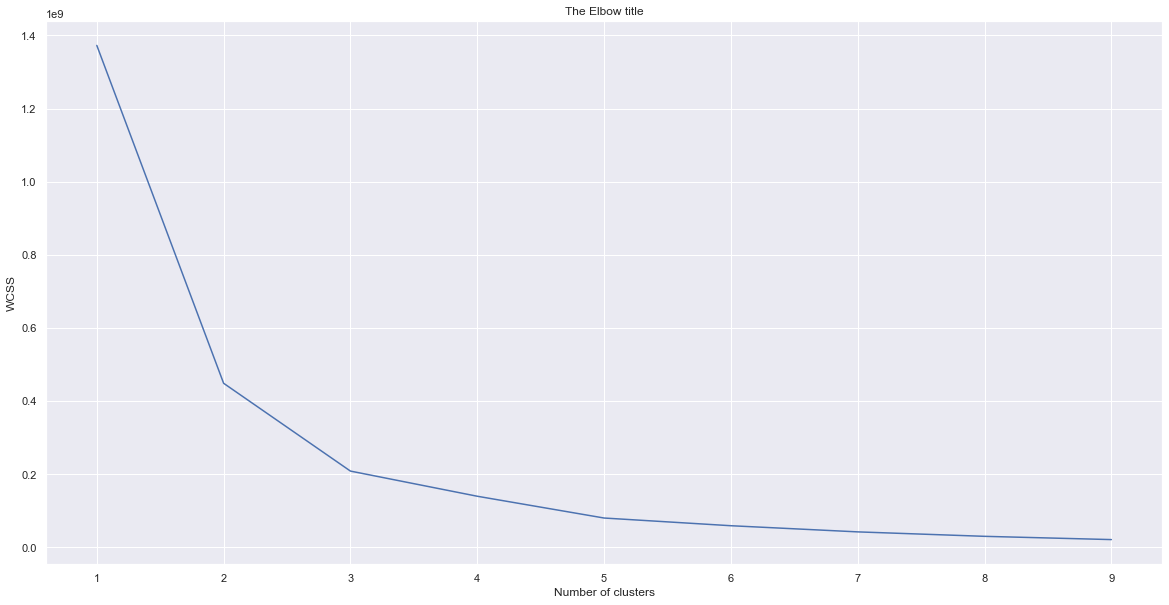

In [150]:
wcss=[]
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,10)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [151]:
kmeans = KMeans(2)
kmeans.fit(x)
identified_clusters = kmeans.fit_predict(x)
x['Clusters'] = identified_clusters
d={}
for i in x.index:
    d[i]=x['Clusters'][i]
d

{1.0: 1,
 2.0: 0,
 3.0: 0,
 4.0: 0,
 5.0: 1,
 6.0: 1,
 7.0: 1,
 8.0: 1,
 9.0: 1,
 10.0: 0,
 11.0: 1,
 12.0: 0,
 13.0: 0,
 15.0: 1,
 16.0: 1,
 17.0: 0,
 18.0: 1,
 19.0: 0,
 20.0: 1,
 21.0: 1,
 23.0: 0,
 24.0: 0,
 25.0: 0,
 26.0: 1,
 27.0: 0,
 28.0: 0,
 29.0: 1,
 30.0: 0,
 31.0: 1,
 32.0: 0,
 33.0: 1,
 35.0: 1,
 36.0: 1,
 37.0: 1,
 38.0: 0,
 39.0: 0,
 40.0: 1,
 41.0: 0,
 42.0: 0,
 43.0: 0,
 47.0: 1,
 48.0: 1,
 51.0: 1,
 52.0: 1,
 55.0: 1,
 56.0: 1,
 57.0: 0,
 58.0: 1,
 59.0: 1,
 60.0: 0,
 62.0: 1,
 63.0: 1,
 64.0: 1,
 65.0: 1,
 66.0: 0,
 68.0: 0,
 69.0: 0,
 70.0: 0,
 72.0: 1,
 73.0: 0,
 74.0: 0,
 75.0: 0,
 76.0: 1,
 77.0: 0,
 78.0: 0,
 79.0: 1,
 80.0: 1,
 81.0: 0,
 82.0: 0,
 83.0: 1,
 84.0: 0,
 85.0: 0,
 86.0: 0,
 87.0: 0,
 88.0: 0,
 89.0: 0,
 90.0: 0,
 92.0: 0,
 93.0: 0,
 94.0: 0,
 95.0: 1,
 96.0: 1,
 97.0: 0,
 98.0: 1,
 99.0: 0,
 100.0: 1,
 102.0: 0,
 103.0: 1,
 104.0: 1,
 105.0: 0,
 106.0: 0,
 107.0: 0}

In [152]:
data['nb pieces'].unique()

array([ 3.,  5.,  8.,  4.,  6.,  2.,  9.,  7.,  1., 10.])

In [153]:
data[data['prix/m²'] >=30000]

prix  Location  superficie  nb pieces  nb chambres  \
44    1107000.0      43.0        36.0        2.0            2   
748   7700000.0      24.0       238.0        6.0            3   
989   2600000.0      84.0        75.0        7.0            4   
1306  7700000.0      24.0       238.0        7.0            3   
1845  2200000.0       3.0        68.0        1.0            1   

      nb salles de bains  rating       prix/m²  
44                   1.0     1.0  30750.000000  
748                  3.0     4.0  32352.941176  
989                  3.0     1.0  34666.666667  
1306                 3.0     4.0  32352.941176  
1845                 1.0     3.0  32352.941176

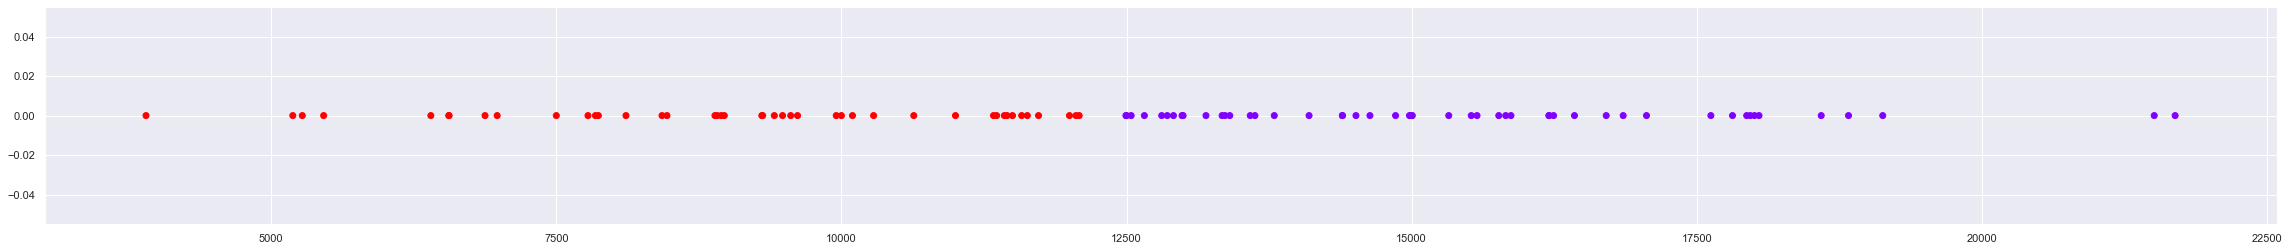

In [154]:
plt.figure(figsize=(40,4))
plt.scatter(x['prix/m²'],[0 for i in range(len(x))],c=x['Clusters'],cmap='rainbow')

In [155]:
print(data['Location'].unique())

[ 75.   3.  28.  77.  92.  24.  64.  42.  70.  15.  31.  95.  99.  56.
  84.  69.  43.  23. 100.  20.  85. 105.  39.  12.  73. 107.  93.  33.
  66.  51.  18.  82.  41. 106.  90.   6.  81.  32. 102.  98.  86.  26.
  25.  10.  83. 103.  40.  80.  27.  30.  88.  79.  72.  78.  17.   5.
   8.  62.  36.   2.  58.  29.   7.  89.  74.  76.  63.  59.  11.   1.
  68.  60.  94.  37.  13. 104.  35.  19.  16.  48.  47.  65.  96.   9.
  38.  97.  57.  21.  52.   4.  87.  55.]


In [156]:
data['Clusters']=data['Location']
data.head()

prix  Location  superficie  nb pieces  nb chambres  \
0  1850000.0      75.0       110.0        3.0            2   
1  2200000.0       3.0       154.0        5.0            3   
2  1202000.0      28.0        78.0        3.0            2   
3  5000000.0       3.0       219.0        8.0            5   
4  2300000.0      77.0       140.0        4.0            2   

   nb salles de bains  rating       prix/m²  Clusters  
0                 1.0     2.0  16818.181818      75.0  
1                 2.0     4.0  14285.714286       3.0  
2                 1.0     0.0  15410.256410      28.0  
3                 4.0     5.0  22831.050228       3.0  
4                 2.0     2.0  16428.571429      77.0

In [157]:
l=[]
for i in x.index:
    for j in data.index:
        if i==data['Location'][j]:
            data['Clusters'][j]=x['Clusters'][i]
data.head()

C:\Users\hp\AppData\Local\Temp/ipykernel_2416/2683947280.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



prix  Location  superficie  nb pieces  nb chambres  \
0  1850000.0      75.0       110.0        3.0            2   
1  2200000.0       3.0       154.0        5.0            3   
2  1202000.0      28.0        78.0        3.0            2   
3  5000000.0       3.0       219.0        8.0            5   
4  2300000.0      77.0       140.0        4.0            2   

   nb salles de bains  rating       prix/m²  Clusters  
0                 1.0     2.0  16818.181818       0.0  
1                 2.0     4.0  14285.714286       0.0  
2                 1.0     0.0  15410.256410       0.0  
3                 4.0     5.0  22831.050228       0.0  
4                 2.0     2.0  16428.571429       0.0

In [158]:
eda_num(data, method='correlation')

Correlation Analysis - Heatmap


C:\Users\hp\anaconda3\lib\site-packages\quickda\explore_numeric.py:30: FutureWarning:

this method is deprecated in favour of `Styler.format(precision=..)`



Feature Importance in the prediction of prix


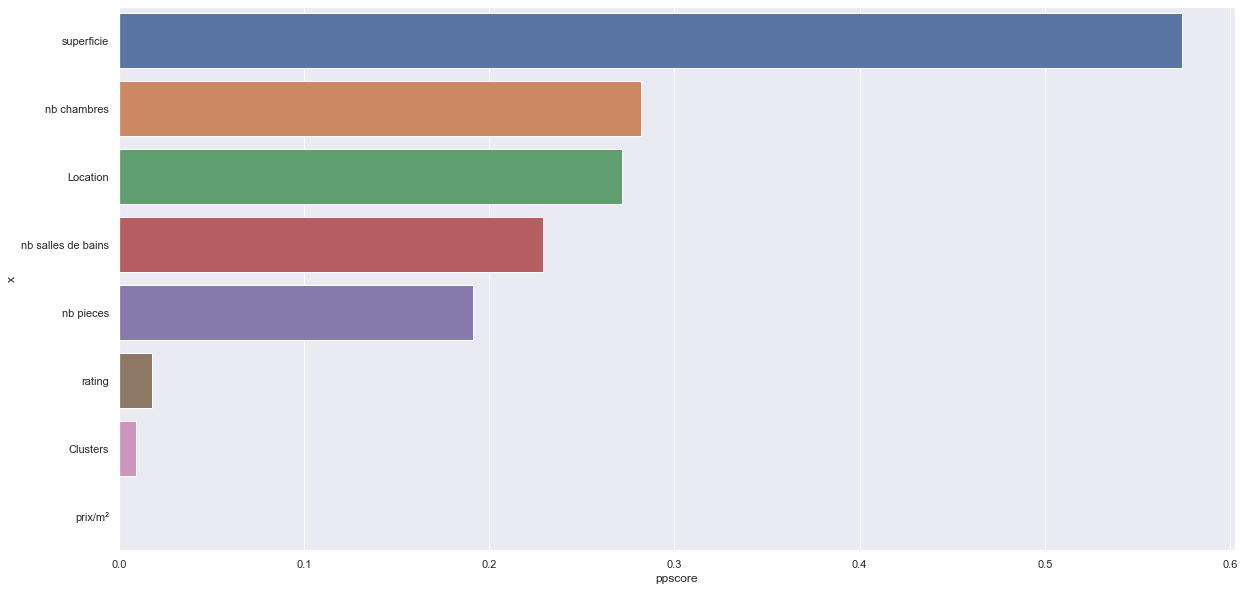

In [159]:
eda_numcat(data, x="prix")

In [160]:
data

prix  Location  superficie  nb pieces  nb chambres  \
0     1850000.0      75.0       110.0        3.0            2   
1     2200000.0       3.0       154.0        5.0            3   
2     1202000.0      28.0        78.0        3.0            2   
3     5000000.0       3.0       219.0        8.0            5   
4     2300000.0      77.0       140.0        4.0            2   
5     2390000.0      92.0       144.0        3.0            2   
6     1466000.0      28.0        98.0        4.0            3   
7     1300000.0      24.0        87.0        6.0            2   
9      924000.0      64.0       100.0        3.0            2   
10    4200000.0      92.0       170.0        4.0            3   
11    4700000.0      92.0       258.0        6.0            4   
12    3200000.0      42.0       191.0        3.0            3   
13    1040000.0      75.0        80.0        2.0            1   
14    1400000.0      70.0        92.0        6.0            2   
15    1600000.0      75.0       137.0        4.0            3   
17    8500000.0       3.0       580.0        5.0            4   
21     880000.0      15.0        88.0        3.0            2   
22    7000000.0      92.0       256.0        9.0            3   
23    2280000.0      75.0       141.0        4.0            3   
24     694000.0      31.0        73.0        3.0            2   
25    1090000.0       3.0        62.0        2.0            1   
26     825000.0      95.0        66.0        3.0            2   
27    2200000.0      24.0       131.0        4.0            3   
28    1725000.0      28.0       130.0        5.0            3   
29     925000.0      75.0        50.0        2.0            1   
30    1091000.0      95.0        90.0        4.0            3   
31    2700000.0      77.0       193.0        4.0            3   
32     934000.0      31.0        99.0        4.0            3   
33    1635000.0      75.0        94.0        4.0            2   
34    2800000.0      92.0       191.0        4.0            3   
35    7000000.0      99.0       450.0        6.0            4   
37    1250000.0      24.0       120.0        4.0            3   
38     550000.0      56.0        73.0        3.0            2   
39    1480000.0      15.0       138.0        5.0            3   
41     750000.0      84.0        87.0        3.0            2   
42    1750000.0      70.0       126.0        7.0            3   
43    1700000.0      69.0       122.0        3.0            2   
44    1107000.0      43.0        36.0        2.0            2   
45    1470000.0      69.0       115.0        3.0            2   
46     890000.0      15.0        85.0        4.0            3   
47    4750000.0      70.0       325.0        8.0            4   
48    2500000.0      24.0       140.0        4.0            3   
49    1550000.0      24.0       130.0        3.0            2   
50    2800000.0      92.0       159.0        4.0            3   
52    1500000.0      23.0       116.0        3.0            2   
53     395000.0     100.0        85.0        3.0            2   
54    1320000.0      75.0        94.0        5.0            2   
55     801000.0      31.0        79.0        3.0            2   
56    1067500.0      75.0        72.0        2.0            1   
57    7090000.0      28.0       435.0        9.0            4   
58    3127000.0      43.0       138.0        3.0            2   
59     895000.0      20.0        91.0        4.0            3   
60    1560000.0      75.0        88.0        3.0            2   
61    1940000.0      85.0       188.0        4.0            3   
62    2150000.0      75.0       174.0        4.0            3   
63     804000.0      31.0        81.0        3.0            2   
64    1950000.0     105.0       110.0        5.0            3   
65    2300000.0      92.0       147.0        3.0            2   
67    1567000.0      28.0       105.0        4.0            3   
68    2990000.0      43.0       174.0        5.0            3   
69    1900000.0      23.0       135.0        4

In [161]:
data.drop(['prix/m²'], axis=1, inplace=True)

In [162]:
data

prix  Location  superficie  nb pieces  nb chambres  \
0     1850000.0      75.0       110.0        3.0            2   
1     2200000.0       3.0       154.0        5.0            3   
2     1202000.0      28.0        78.0        3.0            2   
3     5000000.0       3.0       219.0        8.0            5   
4     2300000.0      77.0       140.0        4.0            2   
5     2390000.0      92.0       144.0        3.0            2   
6     1466000.0      28.0        98.0        4.0            3   
7     1300000.0      24.0        87.0        6.0            2   
9      924000.0      64.0       100.0        3.0            2   
10    4200000.0      92.0       170.0        4.0            3   
11    4700000.0      92.0       258.0        6.0            4   
12    3200000.0      42.0       191.0        3.0            3   
13    1040000.0      75.0        80.0        2.0            1   
14    1400000.0      70.0        92.0        6.0            2   
15    1600000.0      75.0       137.0        4.0            3   
17    8500000.0       3.0       580.0        5.0            4   
21     880000.0      15.0        88.0        3.0            2   
22    7000000.0      92.0       256.0        9.0            3   
23    2280000.0      75.0       141.0        4.0            3   
24     694000.0      31.0        73.0        3.0            2   
25    1090000.0       3.0        62.0        2.0            1   
26     825000.0      95.0        66.0        3.0            2   
27    2200000.0      24.0       131.0        4.0            3   
28    1725000.0      28.0       130.0        5.0            3   
29     925000.0      75.0        50.0        2.0            1   
30    1091000.0      95.0        90.0        4.0            3   
31    2700000.0      77.0       193.0        4.0            3   
32     934000.0      31.0        99.0        4.0            3   
33    1635000.0      75.0        94.0        4.0            2   
34    2800000.0      92.0       191.0        4.0            3   
35    7000000.0      99.0       450.0        6.0            4   
37    1250000.0      24.0       120.0        4.0            3   
38     550000.0      56.0        73.0        3.0            2   
39    1480000.0      15.0       138.0        5.0            3   
41     750000.0      84.0        87.0        3.0            2   
42    1750000.0      70.0       126.0        7.0            3   
43    1700000.0      69.0       122.0        3.0            2   
44    1107000.0      43.0        36.0        2.0            2   
45    1470000.0      69.0       115.0        3.0            2   
46     890000.0      15.0        85.0        4.0            3   
47    4750000.0      70.0       325.0        8.0            4   
48    2500000.0      24.0       140.0        4.0            3   
49    1550000.0      24.0       130.0        3.0            2   
50    2800000.0      92.0       159.0        4.0            3   
52    1500000.0      23.0       116.0        3.0            2   
53     395000.0     100.0        85.0        3.0            2   
54    1320000.0      75.0        94.0        5.0            2   
55     801000.0      31.0        79.0        3.0            2   
56    1067500.0      75.0        72.0        2.0            1   
57    7090000.0      28.0       435.0        9.0            4   
58    3127000.0      43.0       138.0        3.0            2   
59     895000.0      20.0        91.0        4.0            3   
60    1560000.0      75.0        88.0        3.0            2   
61    1940000.0      85.0       188.0        4.0            3   
62    2150000.0      75.0       174.0        4.0            3   
63     804000.0      31.0        81.0        3.0            2   
64    1950000.0     105.0       110.0        5.0            3   
65    2300000.0      92.0       147.0        3.0            2   
67    1567000.0      28.0       105.0        4.0            3   
68    2990000.0      43.0       174.0        5.0            3   
69    1900000.0      23.0       135.0        4

In [163]:
data.to_csv('new_data.csv' , index=False)

### <a class="anchor" id="fe">3. Features Selection

In [165]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import statsmodels.api as sm

X = data[['superficie','nb pieces','nb chambres','nb salles de bains','rating','Clusters']]
y = data.prix
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

result = stepwise_selection(X, y)

print('resulting features:')
print(result)

Add  superficie                     with p-value 0.0
Add  Clusters                       with p-value 5.44332e-33
Add  nb pieces                      with p-value 2.17907e-05
Add  nb salles de bains             with p-value 0.0026196
Add  nb chambres                    with p-value 0.00355363
resulting features:
['superficie', 'Clusters', 'nb pieces', 'nb salles de bains', 'nb chambres']


C:\Users\hp\AppData\Local\Temp/ipykernel_2416/3970583672.py:18: DeprecationWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will b

### <a class="anchor" id="fe1">4. Modeling

### <a class="anchor" id="fe1a">a. Linear Regression 

In [166]:
data.columns

Index(['prix', 'Location', 'superficie', 'nb pieces', 'nb chambres',
       'nb salles de bains', 'rating', 'Clusters'],
      dtype='object')

In [167]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

x = data[['Location', 'superficie', 'nb pieces', 'nb chambres',
       'nb salles de bains', 'Clusters']]
y=data['prix']
X_train, X_test, Y_train, Y_test, = train_test_split(x, y, test_size=0.2, random_state=10)
#Let's build our Linear Regressor
model = LinearRegression() 
model.fit(X_train, Y_train)

LinearRegression()

In [168]:
y_test_pred=model.predict(X_test)
y_train_pred=model.predict(X_train)
mse_test = mean_squared_error(Y_test, y_test_pred)
mse_train = mean_squared_error(Y_train, y_train_pred)
print("MSE train: ", mse_train)
print("MSE test: ", mse_test)


a=r2_score(Y_test, y_test_pred)
b=r2_score(Y_train,y_train_pred)

print("R squared train: ", b)
print("R squared test: ", a)


MSE train:  413500737045.5958
MSE test:  490522147960.4016
R squared train:  0.8877497576105615
R squared test:  0.8620787014549885


In [169]:
X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   prix   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     1434.
Date:                Sun, 17 Apr 2022   Prob (F-statistic):               0.00
Time:                        22:52:25   Log-Likelihood:                -16972.
No. Observations:                1146   AIC:                         3.396e+04
Df Residuals:                    1139   BIC:                         3.399e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.498e+05    8.2

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



### <a class="anchor" id="fe1b">b. Random forest

In [170]:
from dateutil.parser import parse
from datetime import datetime
from scipy.stats import norm

# import all what you need for machine learning
import sklearn
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler

In [171]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 5)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(1, 45, num = 3)]
min_samples_split = [5, 10]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}

In [172]:
forest=RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = forest, param_distributions = random_grid, n_iter = 10, 
            cv = 10, verbose=2, random_state=42, n_jobs = -1, scoring='neg_mean_squared_error')
rf_random.fit(X_train, Y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [1, 23, 45],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10],
                                        'n_estimators': [20, 65, 110, 155,
                                                         200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [146]:
forest=RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = forest, param_distributions = random_grid, n_iter = 10, 
            cv = 10, verbose=2, random_state=42, n_jobs = -1, scoring='neg_mean_squared_error')
rf_random.fit(X_train, Y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [1, 23, 45],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10],
                                        'n_estimators': [20, 65, 110, 155,
                                                         200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [147]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=45, min_samples_split=10, n_estimators=155)

In [148]:
# Performance metrics (MAPE)
random_best= rf_random.best_estimator_.predict(X_train)
errors = abs(random_best - Y_train)
# Calculate mean absolute percentage error (MAPE)
mape = np.mean(100 * (errors / Y_train))
# Calculate and display accuracy
accuracy = 100 - mape    
#print result
print('The best model from the randomized search has an accuracy of', round(accuracy, 2),'%')

The best model from the randomized search has an accuracy of 87.78 %


In [149]:
model=rf_random.best_estimator_
model.fit(X_train,Y_train)
score = model.score(X_train,Y_train)
print("R-squared du modèle Rf:", score)

R-squared du modèle Rf: 0.9595405292759663


In [150]:
y_test_pred=model.predict(X_test)
y_train_pred=model.predict(X_train)
mse_test = mean_squared_error(Y_test, y_test_pred)
mse_train = mean_squared_error(Y_train, y_train_pred)
print("MSE train: ", mse_train)
print("MSE test: ", mse_test)



a=r2_score(Y_test, y_test_pred)
b=r2_score(Y_train,y_train_pred)

print("R squared train: ", b)
print("R squared test: ", a)


MSE train:  149042181190.30753
MSE test:  412353278470.14685
R squared train:  0.9595405292759663
R squared test:  0.8840576315210817


In [151]:
X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   prix   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     1434.
Date:                Sat, 16 Apr 2022   Prob (F-statistic):               0.00
Time:                        01:12:19   Log-Likelihood:                -16972.
No. Observations:                1146   AIC:                         3.396e+04
Df Residuals:                    1139   BIC:                         3.399e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -5.226e+05    8.1

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



### <a class="anchor" id="fe1c">c. Ridge regression

In [152]:
# grid search hyperparameters for ridge regression
from numpy import arange
from pandas import read_csv
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge
# load the dataset
X= data[['Location', 'superficie', 'nb pieces', 'nb chambres',
       'nb salles de bains', 'Clusters']]
y=data['prix']
# define model
model = Ridge()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] =arange(0, 1000, 10)
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, y)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -440693.623
Config: {'alpha': 40}


In [153]:
# evaluate ridge regression model on the dataset
from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge
# load the dataset
X= data[['Location', 'superficie', 'nb pieces', 'nb chambres',
       'nb salles de bains', 'Clusters']]
y=data['prix']
X_train, X_test, Y_train, Y_test, = train_test_split(X, y, test_size=0.2, random_state=10)
# define model
model = Ridge(alpha=results.best_params_['alpha'])
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))


Mean MAE: 440693.623 (38268.295)


In [154]:
model.fit(X_train,Y_train)
y_test_pred=model.predict(X_test)
y_train_pred=model.predict(X_train)
mse_test = mean_squared_error(Y_test, y_test_pred)
mse_train = mean_squared_error(Y_train, y_train_pred)
print("MSE train: ", mse_train)
print("MSE test: ", mse_test)

a=r2_score(Y_test, y_test_pred)
b=r2_score(Y_train,y_train_pred)

print("R squared train: ", b)
print("R squared_test: ", a)

MSE train:  416739682873.55945
MSE test:  503223866692.598
R squared train:  0.8868705029401277
R squared_test:  0.8585073284831826


###  <a class="anchor" id="fe1d">d. Lasso Regression

In [155]:
data.shape

(1146, 8)

In [156]:
# grid search hyperparameters for lasso regression
from numpy import arange
import pandas as pd
import numpy as np
from pandas import read_csv
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
# load the dataset
X= data[['Location', 'superficie', 'nb pieces', 'nb chambres',
       'nb salles de bains', 'Clusters']]
y=data['prix']

# define model
model = Lasso()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = arange(500, 100000, 1000)
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, y)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -442887.635
Config: {'alpha': 11500}


In [157]:
# evaluate an lasso regression model on the dataset
from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
# load the dataset
X= data[['Location', 'superficie', 'nb pieces', 'nb chambres',
       'nb salles de bains', 'Clusters']]
y=data['prix']
X_train, X_test, Y_train, Y_test, = train_test_split(X, y, test_size=0.2, random_state=10)
# define model
model = Lasso(alpha=11500)

# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive

scores = absolute(scores)

print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean MAE: 442887.635 (38528.418)


In [158]:
model.fit(X_train,Y_train)
y_test_pred=model.predict(X_test)
y_train_pred=model.predict(X_train)
mse_test = mean_squared_error(Y_test, y_test_pred)
mse_train = mean_squared_error(Y_train, y_train_pred)
print("MSE train: ", mse_train)
print("MSE test: ", mse_test)



a=r2_score(Y_test, y_test_pred)
b=r2_score(Y_train,y_train_pred)

print("R squared train: ", b)
print("R squared_test: ", a)


MSE train:  415641735362.1801
MSE test:  497166111370.1171
R squared train:  0.8871685553091846
R squared_test:  0.8602106021963442


In [159]:
#p-value obtenue nulle ? Ca devrait être bon , mais est-ce que c'est logique ?

### <a class="anchor" id="fe1e">e. Elastic Net Regression

In [165]:
# grid search hyperparameters for the elastic net
from numpy import arange
from pandas import read_csv
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import ElasticNet


# load the dataset
X= data[['Location', 'superficie', 'nb pieces', 'nb chambres',
       'nb salles de bains', 'Clusters']]
y=data['prix']
# define model


model = ElasticNet()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = arange(500, 10000, 100)
grid['l1_ratio'] = arange(0, 1, 0.1)
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, y)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -500410.752
Config: {'alpha': 500, 'l1_ratio': 0.9}


In [167]:
# evaluate an elastic net model on the dataset
from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import ElasticNet
# load the dataset

X= data[['Location', 'superficie', 'nb pieces', 'nb chambres',
       'nb salles de bains', 'Clusters']]
y=data['prix']
X_train, X_test, Y_train, Y_test, = train_test_split(X, y, test_size=0.2, random_state=10)

# define model
model = ElasticNet(alpha=500, l1_ratio= 0.9)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean MAE: 500410.752 (35176.512)


In [168]:
model.fit(X_train,Y_train)
y_test_pred=model.predict(X_test)
y_train_pred=model.predict(X_train)
mse_test = mean_squared_error(Y_test, y_test_pred)
mse_train = mean_squared_error(Y_train, y_train_pred)
print("MSE train: ", mse_train)
print("MSE test: ", mse_test)



a=r2_score(Y_test, y_test_pred)
b=r2_score(Y_train,y_train_pred)

print("R squared train: ", b)
print("R squared: ", a)

MSE train:  483186599574.0328
MSE test:  615054598521.7524
R squared train:  0.8688326088387769
R squared:  0.8270636111806133


### <a class="anchor" id="fe1f">f. Regression bilineaire


In [169]:
# Set independent and dependent variables
X = data[['Clusters', 'superficie']].values.reshape(-1,2)
y = data['prix']
# Initialize model from sklearn and fit it into our data
regr = LinearRegression()
model = regr.fit(X, y)
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

Intercept: -512601.76764895907
Coefficients: [644289.69351899  15294.67957501]


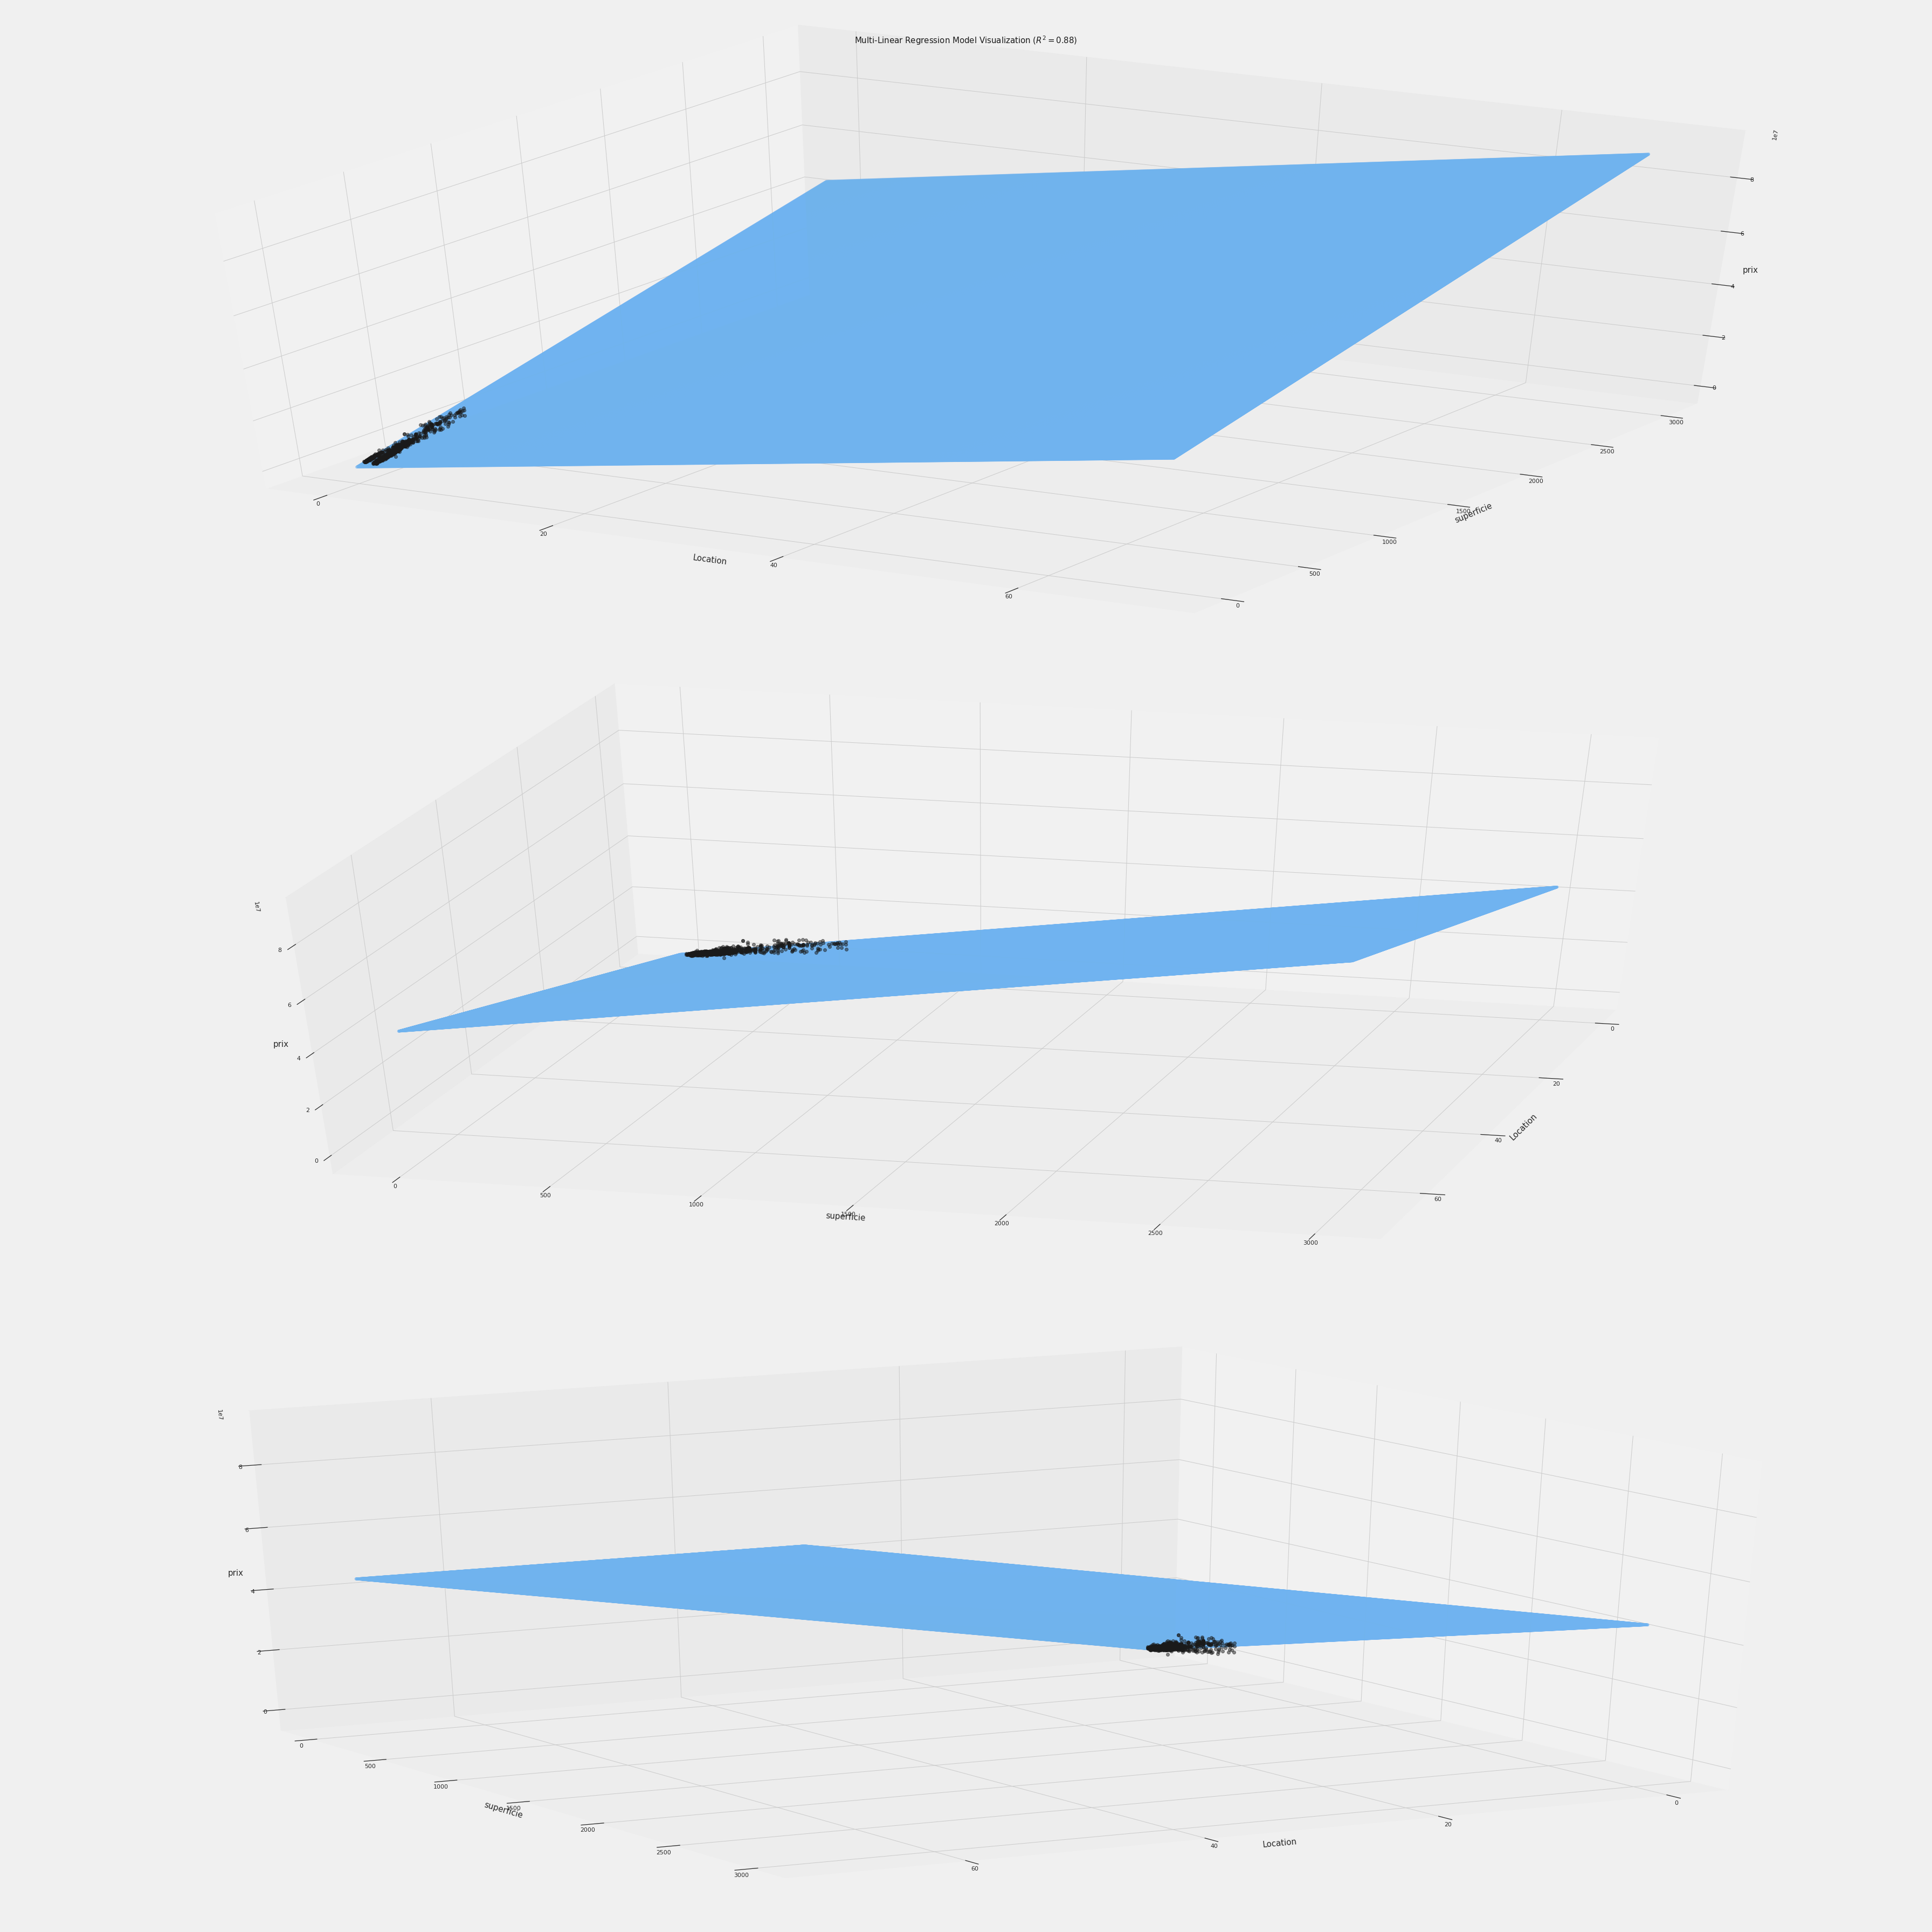

In [170]:
# Prepare data
X = data[['Clusters', 'superficie']].values.reshape(-1,2)
Y = data['prix']
# Create range for each dimension
x = X[:, 0]
y = X[:, 1]
z = Y
xx_pred = np.linspace(0, 70, 700)
yy_pred = np.linspace(0, 3000, 3000) 
xx_pred, yy_pred = np.meshgrid(xx_pred, yy_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T
# Predict using model built on previous step
# ols = linear_model.LinearRegression()
# model = ols.fit(X, Y)
predicted = model.predict(model_viz)
# Evaluate model by using it's R^2 score 
r2 = model.score(X, Y)
#%matplotlib notebook 
# Plot model visualization
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(50,50))
ax1 = fig.add_subplot(311, projection='3d')
ax2 = fig.add_subplot(312, projection='3d')
ax3 = fig.add_subplot(313, projection='3d')
axes = [ax1, ax2, ax3]
for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('Location', fontsize=15)
    ax.set_ylabel('superficie', fontsize=15)
    ax.set_zlabel('prix', fontsize=15)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')
ax1.view_init(elev=40, azim=-60)
ax2.view_init(elev=40, azim=15)
ax3.view_init(elev=25, azim=60)
fig.suptitle('Multi-Linear Regression Model Visualization ($R^2 = %.2f$)' % r2, fontsize=15, color='k')
fig.tight_layout()

In [171]:
model.fit(X_train,Y_train)
y_test_pred=model.predict(X_test)
y_train_pred=model.predict(X_train)
mse_test = mean_squared_error(Y_test, y_test_pred)
mse_train = mean_squared_error(Y_train, y_train_pred)
print("MSE train: ", mse_train)
print("MSE test: ", mse_test)



a=r2_score(Y_test, y_test_pred)
b=r2_score(Y_train,y_train_pred)

print("R squared train: ", b)
print("R squared: ", a)

MSE train:  413500737045.5958
MSE test:  490522147960.4018
R squared train:  0.8877497576105615
R squared:  0.8620787014549885


In [172]:
X = data[['Location', 'superficie']]
X = sm.add_constant(X) # adding a constant
olsmod = sm.OLS(data['prix'], X).fit()
print(olsmod.summary())

                            OLS Regression Results                            
Dep. Variable:                   prix   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     3524.
Date:                Sat, 16 Apr 2022   Prob (F-statistic):               0.00
Time:                        01:21:08   Log-Likelihood:                -17073.
No. Observations:                1146   AIC:                         3.415e+04
Df Residuals:                    1143   BIC:                         3.417e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3124.3669   5.47e+04      0.057      0.9

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



In [173]:
print('F-statistic:', olsmod.fvalue)
print('Probability of observing value at least as high as F-statistic:', olsmod.f_pvalue)

F-statistic: 3524.0035739137875
Probability of observing value at least as high as F-statistic: 0.0


In [174]:
print(olsmod.pvalues)

const         0.954436
Location      0.034905
superficie    0.000000
dtype: float64


In [175]:
data['prix_pred'] = olsmod.predict(X)
data['residual'] = olsmod.resid
data.head()

prix  Location  superficie  nb pieces  nb chambres  \
0  1850000.0      75.0       110.0        3.0            2   
1  2200000.0       3.0       154.0        5.0            3   
2  1202000.0      28.0        78.0        3.0            2   
3  5000000.0       3.0       219.0        8.0            5   
4  2300000.0      77.0       140.0        4.0            2   

   nb salles de bains  rating  Clusters     prix_pred      residual  
0                 1.0     2.0       1.0  1.635540e+06  2.144600e+05  
1                 2.0     4.0       1.0  2.434301e+06 -2.343015e+05  
2                 1.0     0.0       1.0  1.196649e+06  5.350527e+03  
3                 4.0     5.0       1.0  3.462258e+06  1.537742e+06  
4                 2.0     2.0       1.0  2.107123e+06  1.928774e+05

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



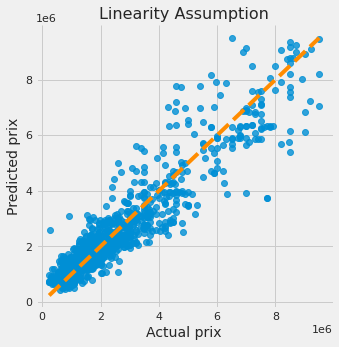

In [176]:
sns.lmplot(x='prix', y='prix_pred', data=data, fit_reg=False, size=5)  
# Plotting the diagonal line
line_coords = np.arange(data[['prix', 'prix_pred']].min().min()-10, 
                        data[['prix', 'prix_pred']].max().max()+10)
plt.plot(line_coords, line_coords,  # X and y points
         color='darkorange', linestyle='--')

plt.ylabel('Predicted prix', fontsize=14)
plt.xlabel('Actual prix', fontsize=14)
plt.title('Linearity Assumption', fontsize=16)
plt.show()

p-value from the test Anderson-Darling test below 0.05 generally means non-normal: 0.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



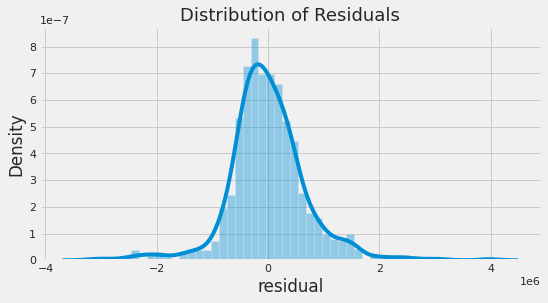

0.0
Residuals are not normally distributed


In [177]:
from statsmodels.stats.diagnostic import normal_ad

# Performing the test on the residuals
p_value = normal_ad(data['residual'])[1]
print('p-value from the test Anderson-Darling test below 0.05 generally means non-normal:', p_value)

# Plotting the residuals distribution
plt.subplots(figsize=(8, 4))
plt.title('Distribution of Residuals', fontsize=18)
sns.distplot(data['residual'])
plt.show()
print(p_value)
# Reporting the normality of the residuals
if p_value < 0.001:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')

Pearson correlation coefficient matrix of each variables:
                 prix  Location  superficie
prix        1.000000 -0.097226    0.927314
Location   -0.097226  1.000000   -0.079762
superficie  0.927314 -0.079762    1.000000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



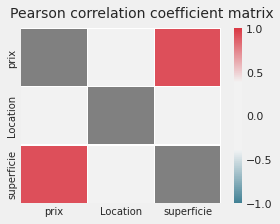

In [178]:
corr = data[['prix', 'Location', 'superficie']].corr()
print('Pearson correlation coefficient matrix of each variables:\n', corr)

# Generate a mask for the diagonal cell
mask = np.zeros_like(corr, dtype=np.bool)
np.fill_diagonal(mask, val=True)

# Initialize matplotlib figure
fig, ax = plt.subplots(figsize=(4, 3))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True, sep=100)
cmap.set_bad('grey')

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5)
fig.suptitle('Pearson correlation coefficient matrix', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=10)
# fig.tight_layout()

In [179]:
from statsmodels.stats.stattools import durbin_watson
durbinWatson = durbin_watson(data['residual'])
print('Durbin-Watson:', durbinWatson)
if durbinWatson < 1.5:
    print('Signs of positive autocorrelation', '\n')
    print('Assumption not satisfied')
elif durbinWatson > 2.5:
    print('Signs of negative autocorrelation', '\n')
    print('Assumption not satisfied')
else:
    print('Little to no autocorrelation', '\n')
    print('Assumption satisfied')

Durbin-Watson: 1.9827176985632415
Little to no autocorrelation 

Assumption satisfied


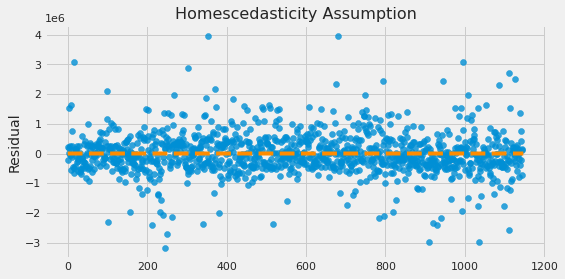

In [180]:
# Plotting the residuals
plt.subplots(figsize=(8, 4))
plt.scatter(x=[i for i in range(len(data.index))], y=data.residual, alpha=0.8)
plt.plot(np.repeat(0, len(data.index)+2), color='darkorange', linestyle='--')

plt.ylabel('Residual', fontsize=14)
plt.xlabel('', fontsize=14)
plt.title('Homescedasticity Assumption', fontsize=16)
plt.show()

### <a class="anchor" id="fe2">5. Tests

In [184]:
residuals=Y_train-y_train_pred#issus de la régression classique

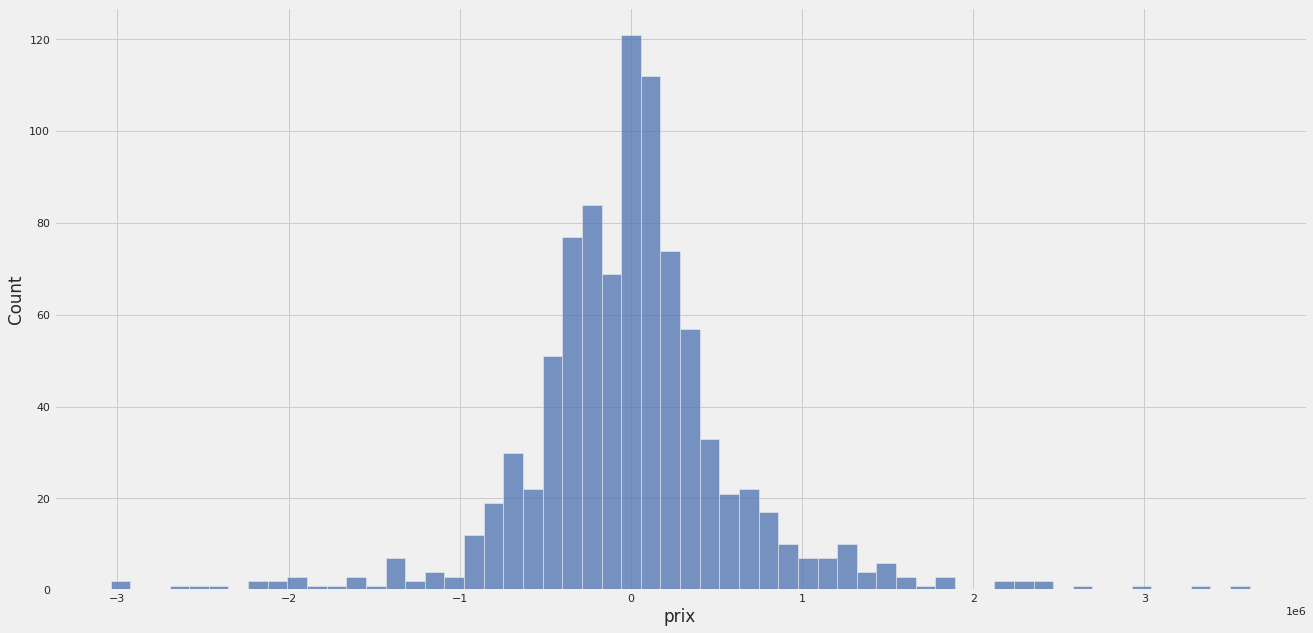

In [185]:
import seaborn as sns
sns.histplot(residuals)

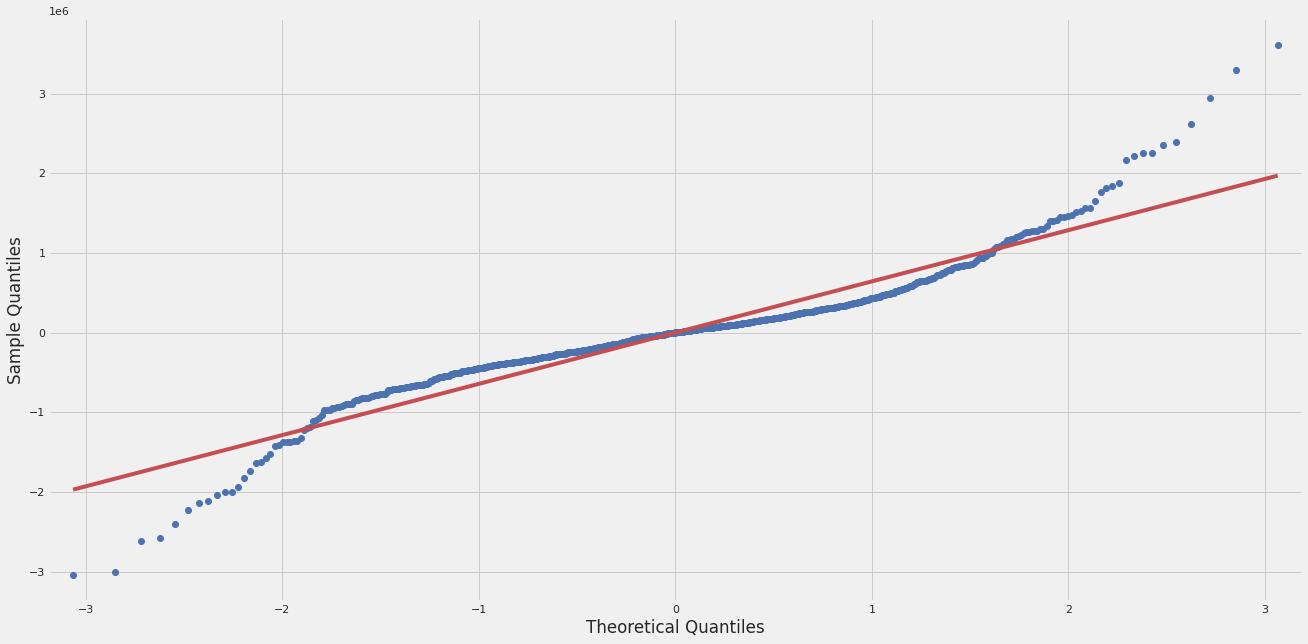

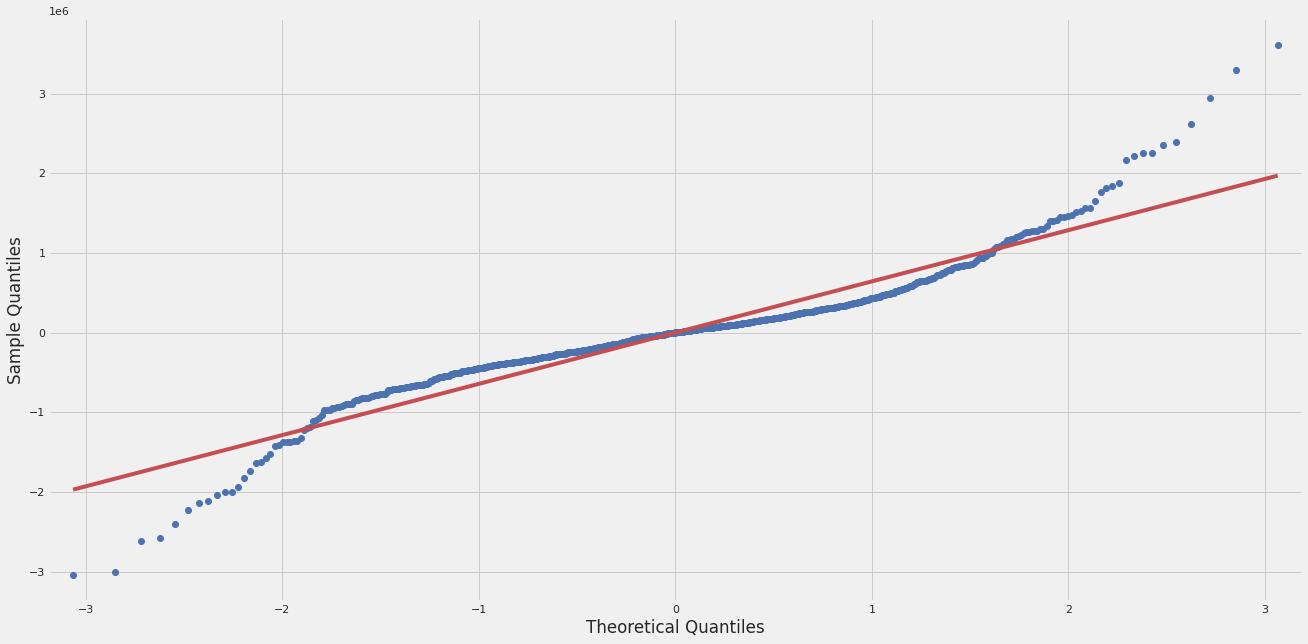

In [186]:
sm.qqplot(residuals, line='s')

In [187]:
print('skew '+str(residuals.skew()))#skewness proche de 0

skew 0.2847171752073288


sumsquare_error          aic           bic  kl_div
invweibull     2.042413e-13  3383.247751 -41536.846821     inf
invgamma       2.105777e-13  3379.697084 -41501.834059     inf
johnsonsu      2.137629e-13  3376.966274 -41477.585145     inf
fisk           2.201049e-13  3389.153503 -41451.123881     inf
exponnorm      2.242790e-13  3366.789071 -41429.594633     inf

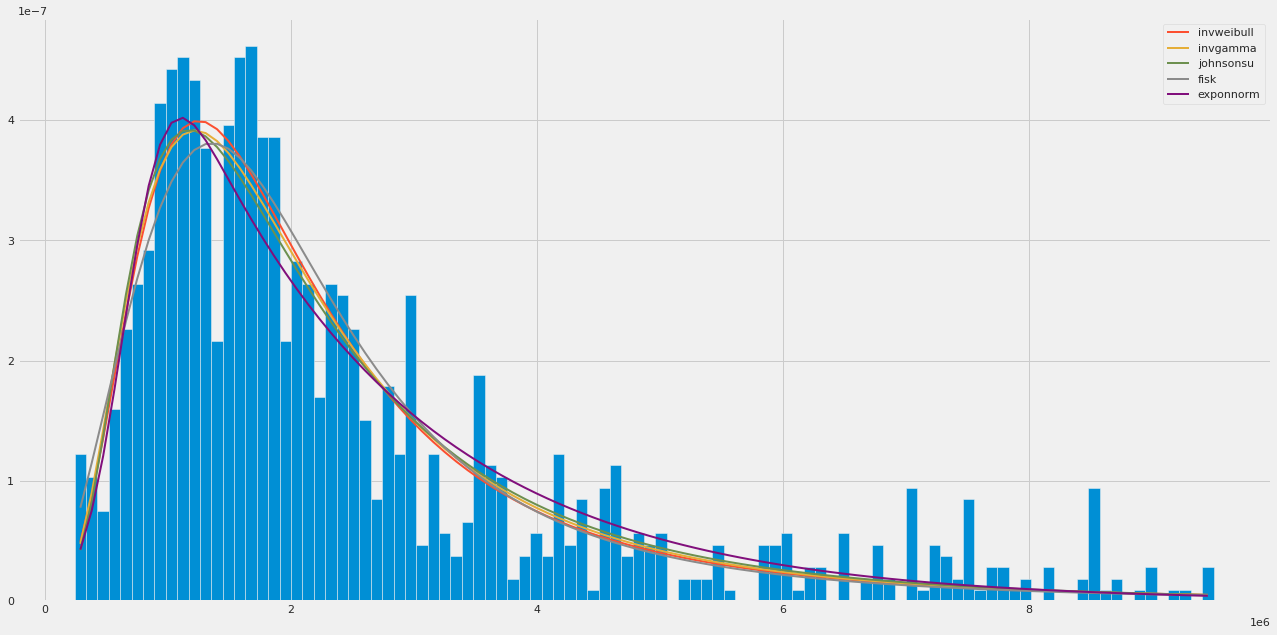

In [192]:
from fitter import Fitter, get_common_distributions, get_distributions
f = Fitter(data.prix)
f.fit()
f.summary()

In [193]:
parameters=f.get_best(method = 'sumsquare_error')

In [194]:
c= 2.9397433883926674
loc= -1335004.8180393795
scale= 2852432.24324846

In [195]:
stats.kstest(data['prix'], 'invweibull', (c, loc, scale))

KstestResult(statistic=0.02909296792453353, pvalue=0.2819034818892376)